# Machine Learning and Neural Networks Midterm CM3015

This dataset (originally from the Spotify API but downloaded from Kaggle) can be accessed [here](https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data?select=taylor_swift_spotify.csv).

In [11]:
# Using pandas to pre-process and load the dataset
import pandas as pd
# Use this to create own classifier
import numpy as np
# Visualization lib
import matplotlib.pyplot as plt
# seaborn for colored and high-level plotting
import seaborn as sns
%matplotlib inline

## Overview and Visualization of Dataset

In [2]:
df = pd.read_csv('taylor_swift_spotify.csv')
print(f"Data shape: {df.shape}")
# Get an overview of the dataset
df.head(10)

Data shape: (530, 18)


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289
5,5,Shake It Off (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,6,50yNTF0Od55qnHLxYsA5Pw,spotify:track:50yNTF0Od55qnHLxYsA5Pw,0.012100,0.636,0.808,0.000022,0.3590,-5.693,0.0729,160.058,0.917,77,219209
6,6,I Wish You Would (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,7,3FxJDucHWdw6caWTKO5b23,spotify:track:3FxJDucHWdw6caWTKO5b23,0.003540,0.670,0.858,0.000013,0.0687,-6.528,0.0439,118.009,0.539,77,207650
7,7,Bad Blood (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,8,7oZONwFiFIErZcXAtTu7FY,spotify:track:7oZONwFiFIErZcXAtTu7FY,0.036200,0.618,0.683,0.000000,0.3050,-6.438,0.1940,169.971,0.363,77,211103
8,8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,9,27exgla7YBw9DUNNcTIpjy,spotify:track:27exgla7YBw9DUNNcTIpjy,0.043600,0.589,0.674,0.000072,0.1120,-7.480,0.0656,139.985,0.514,77,220433
9,9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version) [Deluxe],27/10/2023,10,733OhaXQIHY7BKtY3vnSkn,spotify:track:733OhaXQIHY7BKtY3vnSkn,0.001960,0.758,0.691,0.000011,0.0939,-5.798,0.0515,119.997,0.538,77,247533


The main problem with this dataset with respect to the aim of this project is that there are multiple re-releases of the same album. For instance, here we can see all of the albums which are a very similar version of the '1989' album:

In [3]:
# As we can see here, there are 75 rows/songs which belong to an album which contains the name '1989'
print(f"Nr of songs in an album which is some version of 1989: {len(df[df['album'].str.contains('1989')])}")
# And the unique list of album names which are some version of '1989' --> there are three albums with very similar songs on them.
print(f"Versions of album '1989': {df[df['album'].str.contains('1989')]['album'].unique()}")

Nr of songs in an album which is some version of 1989: 75
Versions of album '1989': ["1989 (Taylor's Version) [Deluxe]" "1989 (Taylor's Version)"
 '1989 (Deluxe Edition)' '1989']


It is easy to imagine how having multiple re-releases of the same album but only one version of another particular album could make it difficult for the classifier to differentate between different albums, if they contain the same songs with very slight musical differences between them. 

Furthermore, this can lead to high variance and overfitting, because the algorithm might pick out patterns which represent the very slight differences between the different releases of the same album, rather than learning more general patterns focused on distinctions between albums.

One solution to this problem is to rename the different versions of the same album all so they have the same title. However, this will create an imbalance in the training data, as some albums (which have been re-released several times) will be over-represented, whereas some albums which have not had a special release yet, such as the debut 'Taylor Swift' album will be under-represented. 

Consequently, applying techniques such as nested cross-validation on folds with randomly-selected indices is really essential here to ensure that the least-represented classes get trained on. It will therefore be interesting to compare different classification models (K-Nearest Neighbour, Naive Bayes and Decision Trees) to see which performs best on imbalanced data. 


In [13]:
# Set all albums which are a version of the same album to have the same 'album' name in the DataFrame, using the 'replace' method
# First get list of distinct album names
albums = df['album'].unique() 
albums

array(['1989', 'Speak Now', 'Midnights', 'Red', 'Fearless', 'evermore',
       'folklore', 'Lover', 'reputation',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

In [5]:
# 1. Replace all 1989 versions with only '1989'
# Boolean mask: get true-false array depending on whether 'album' contains sub-string '1989'
mask1 = df['album'].str.contains('1989') 
df.loc[mask1, 'album'] = '1989'

In [6]:
# 2. Do this for the other albums with duplicated versions
mask2 = df['album'].str.contains('Midnights')
df.loc[mask2, 'album'] = 'Midnights'
mask3 = df['album'].str.contains('Red')
df.loc[mask3, 'album'] = 'Red'
mask4 = df['album'].str.contains('Speak Now')
df.loc[mask4, 'album'] = 'Speak Now'
mask5 = df['album'].str.contains('folklore')
df.loc[mask5, 'album'] = 'folklore'
mask6 = df['album'].str.contains('Fearless')
df.loc[mask6, 'album'] = 'Fearless'
mask7 = df['album'].str.contains('reputation')
df.loc[mask7, 'album'] = 'reputation'
mask8 = df['album'].str.contains('evermore')
df.loc[mask8, 'album'] = 'evermore'

In [7]:
# Now compare the album names: much simpler!
df['album'].unique() 

array(['1989', 'Speak Now', 'Midnights', 'Red', 'Fearless', 'evermore',
       'folklore', 'Lover', 'reputation',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

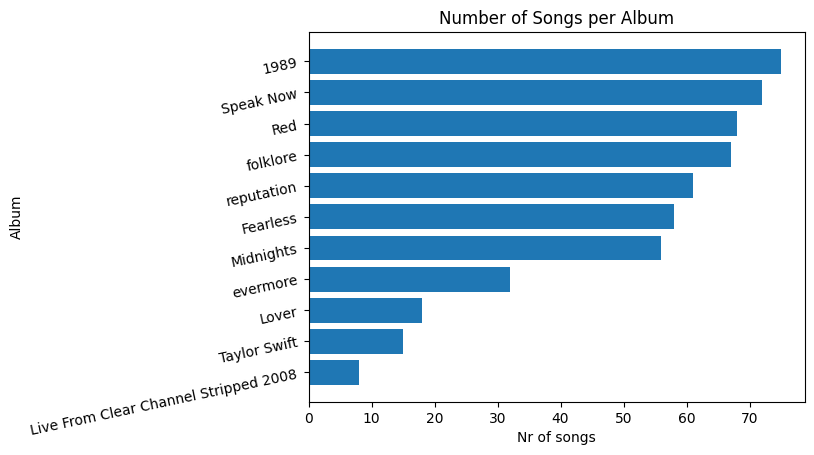

In [8]:
# Print out how many songs in each album
# It is clear that evermore and Taylor Swift debut album are underrepresented
# 'Live From Clear Channel Stripped 2008' is a compilation of songs from different albums, so it doesn't overrepresent one particular album
album_song_counts = df.groupby('album').size().reset_index(name='nr of songs').sort_values(by='nr of songs')
# Create a horizontal bar chart using matplotlib with albums on y-axis and song counts on the x-axis
plt.barh(album_song_counts['album'], album_song_counts['nr of songs'])
# Add axes labels
plt.ylabel('Album')
plt.xlabel('Nr of songs')
plt.title('Number of Songs per Album')
# Rotate the labels on the y-axis (Albums) so easier to read them
plt.yticks(rotation=12)
plt.show()

In [9]:
df.to_csv('taylor_swift_processed.csv', index=False)

In [16]:
df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989,27/10/2023,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,1,Blank Space (Taylor's Version),1989,27/10/2023,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,2,Style (Taylor's Version),1989,27/10/2023,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,3,Out Of The Woods (Taylor's Version),1989,27/10/2023,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989,27/10/2023,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,Our Song,Taylor Swift,24/10/2006,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.111000,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,76,201106
526,526,I'm Only Me When I'm With You,Taylor Swift,24/10/2006,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.004520,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,61,213053
527,527,Invisible,Taylor Swift,24/10/2006,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.637000,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,58,203226
528,528,A Perfectly Good Heart,Taylor Swift,24/10/2006,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.003490,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,56,220146


In [62]:
feature_names

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

C:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


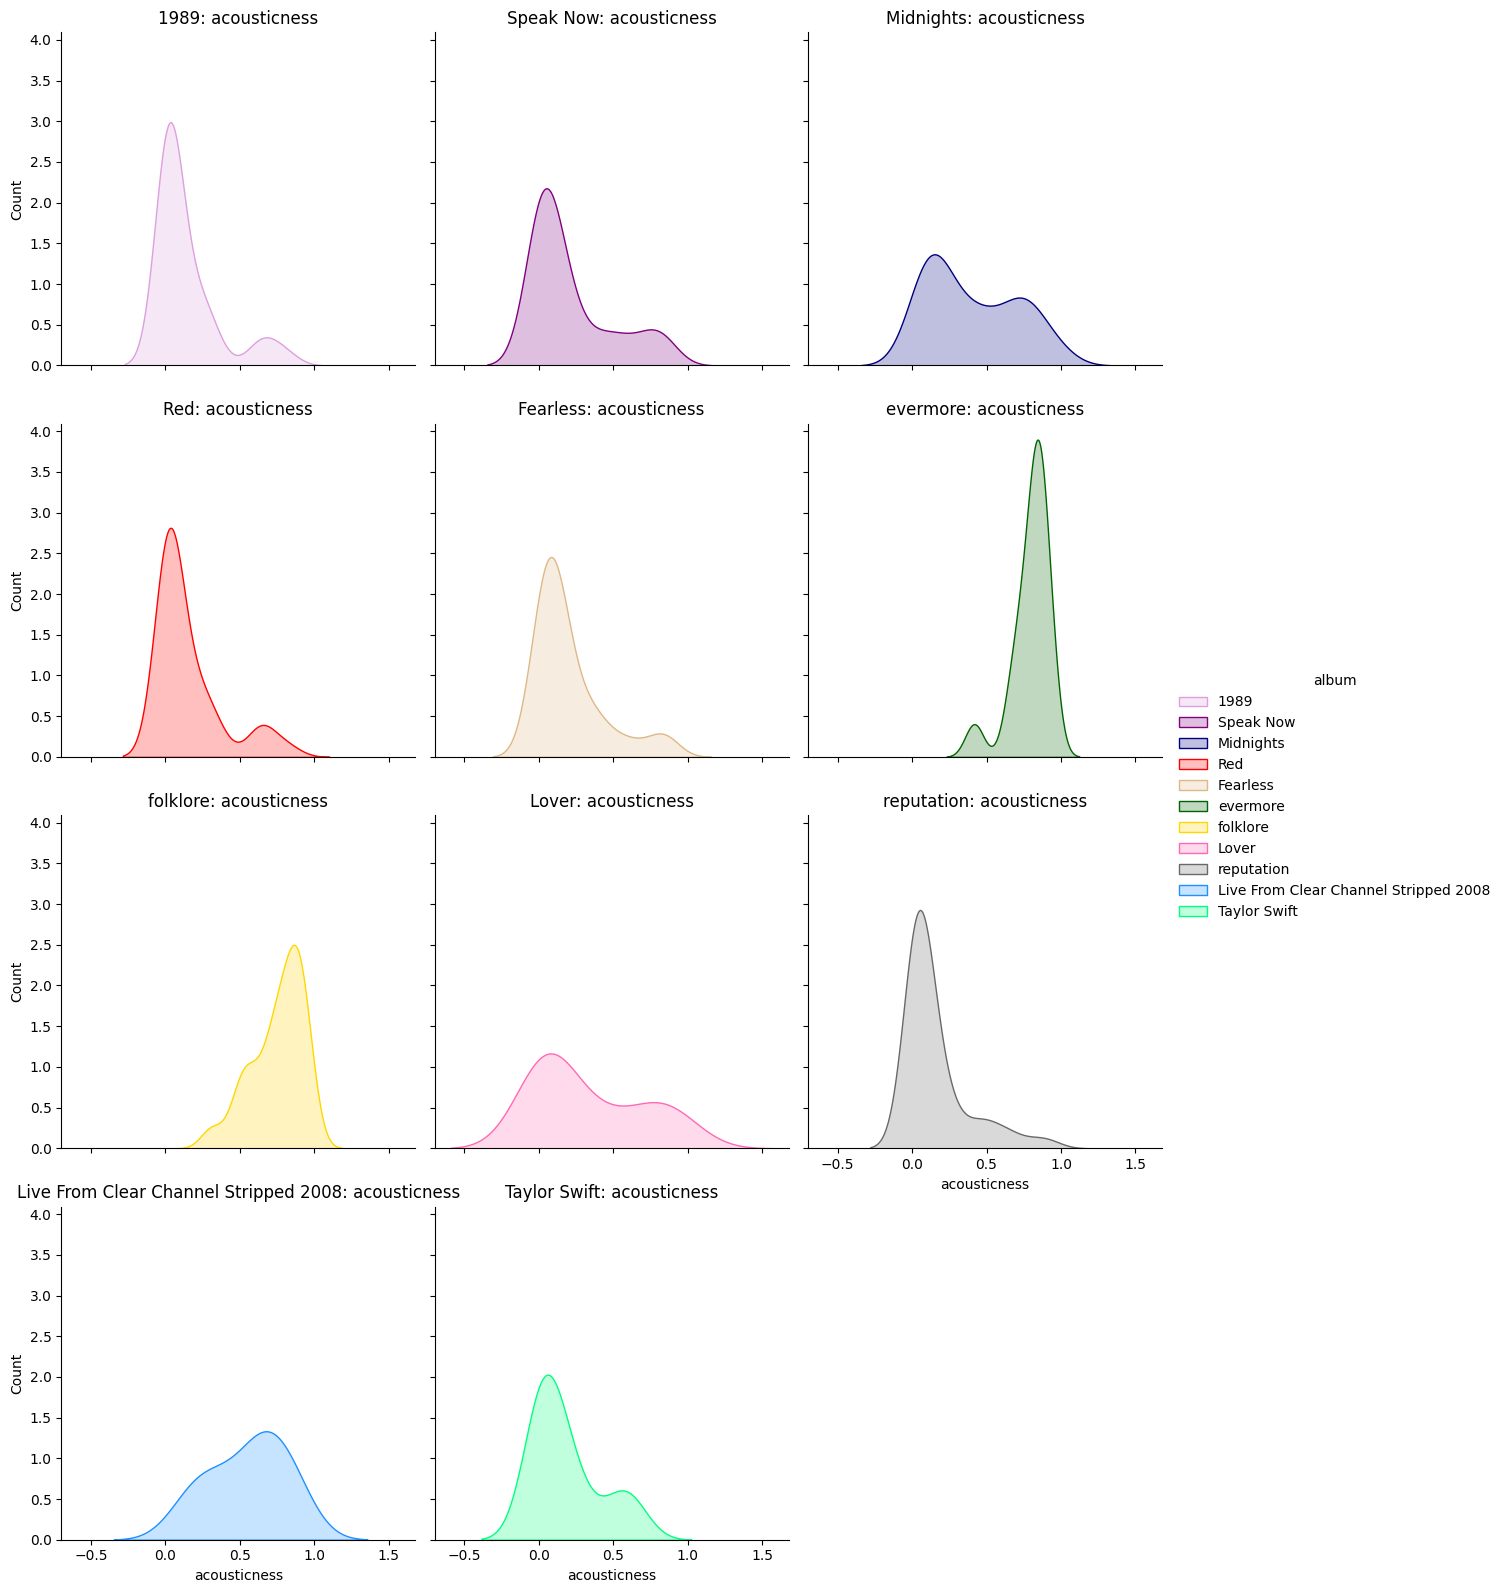

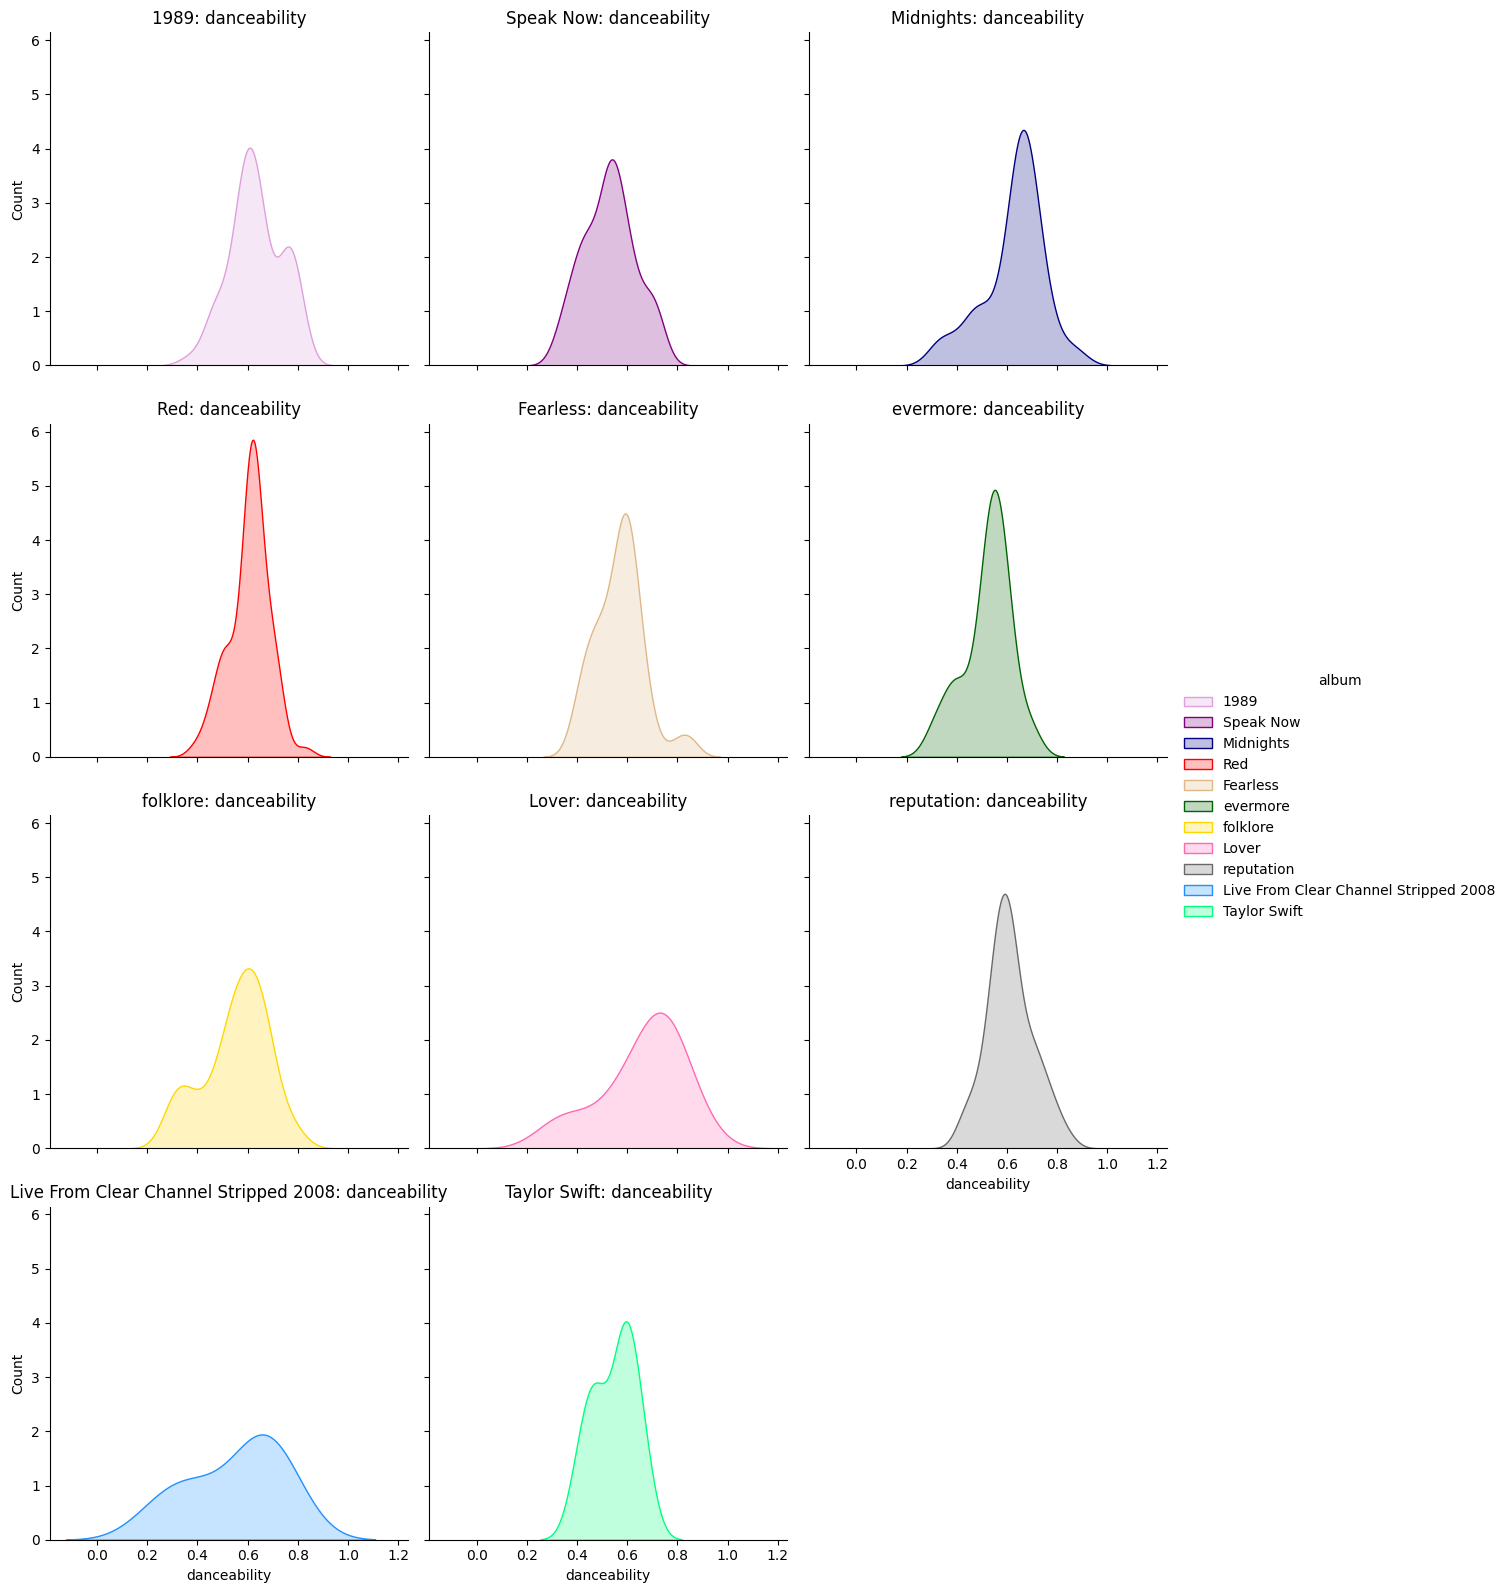

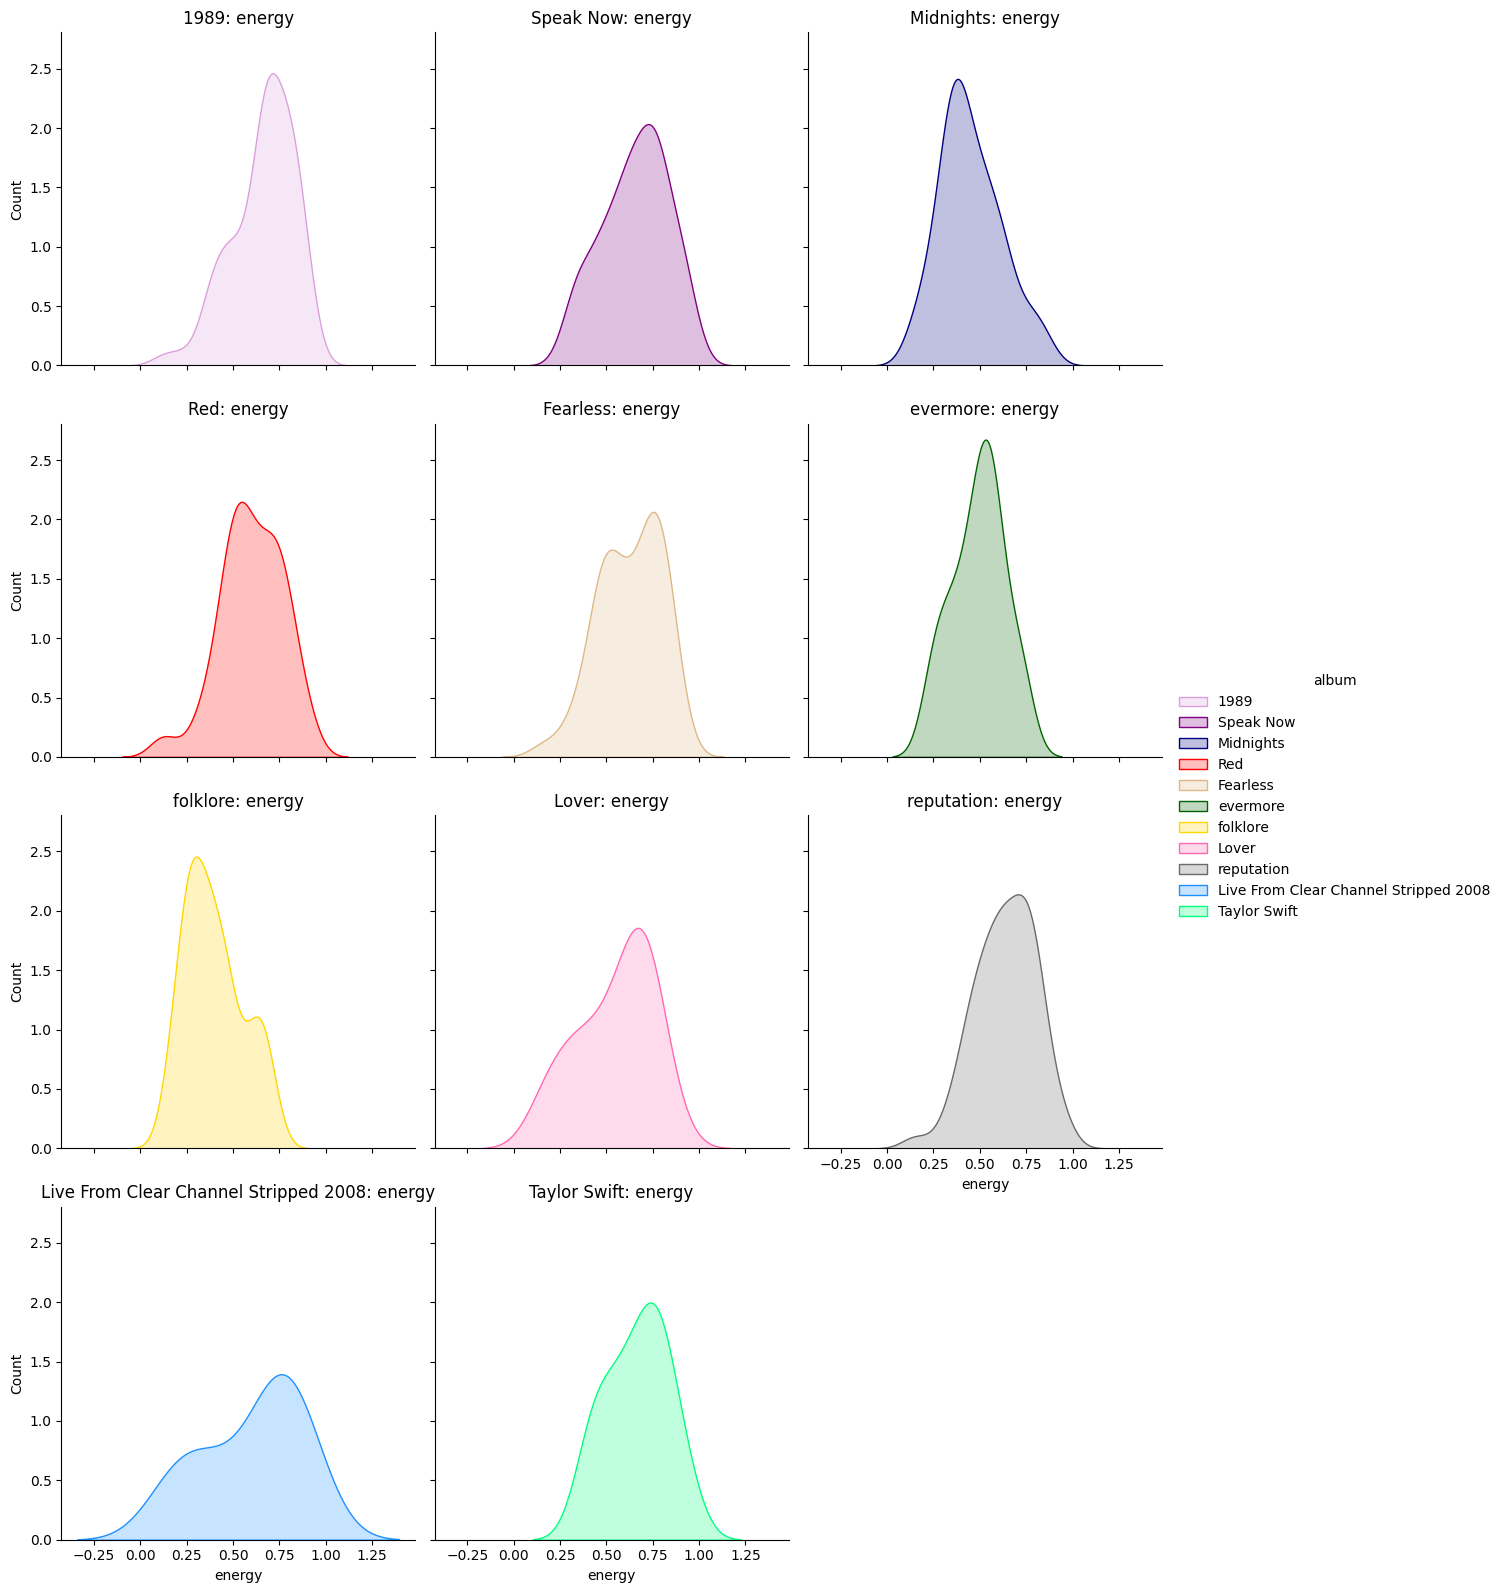

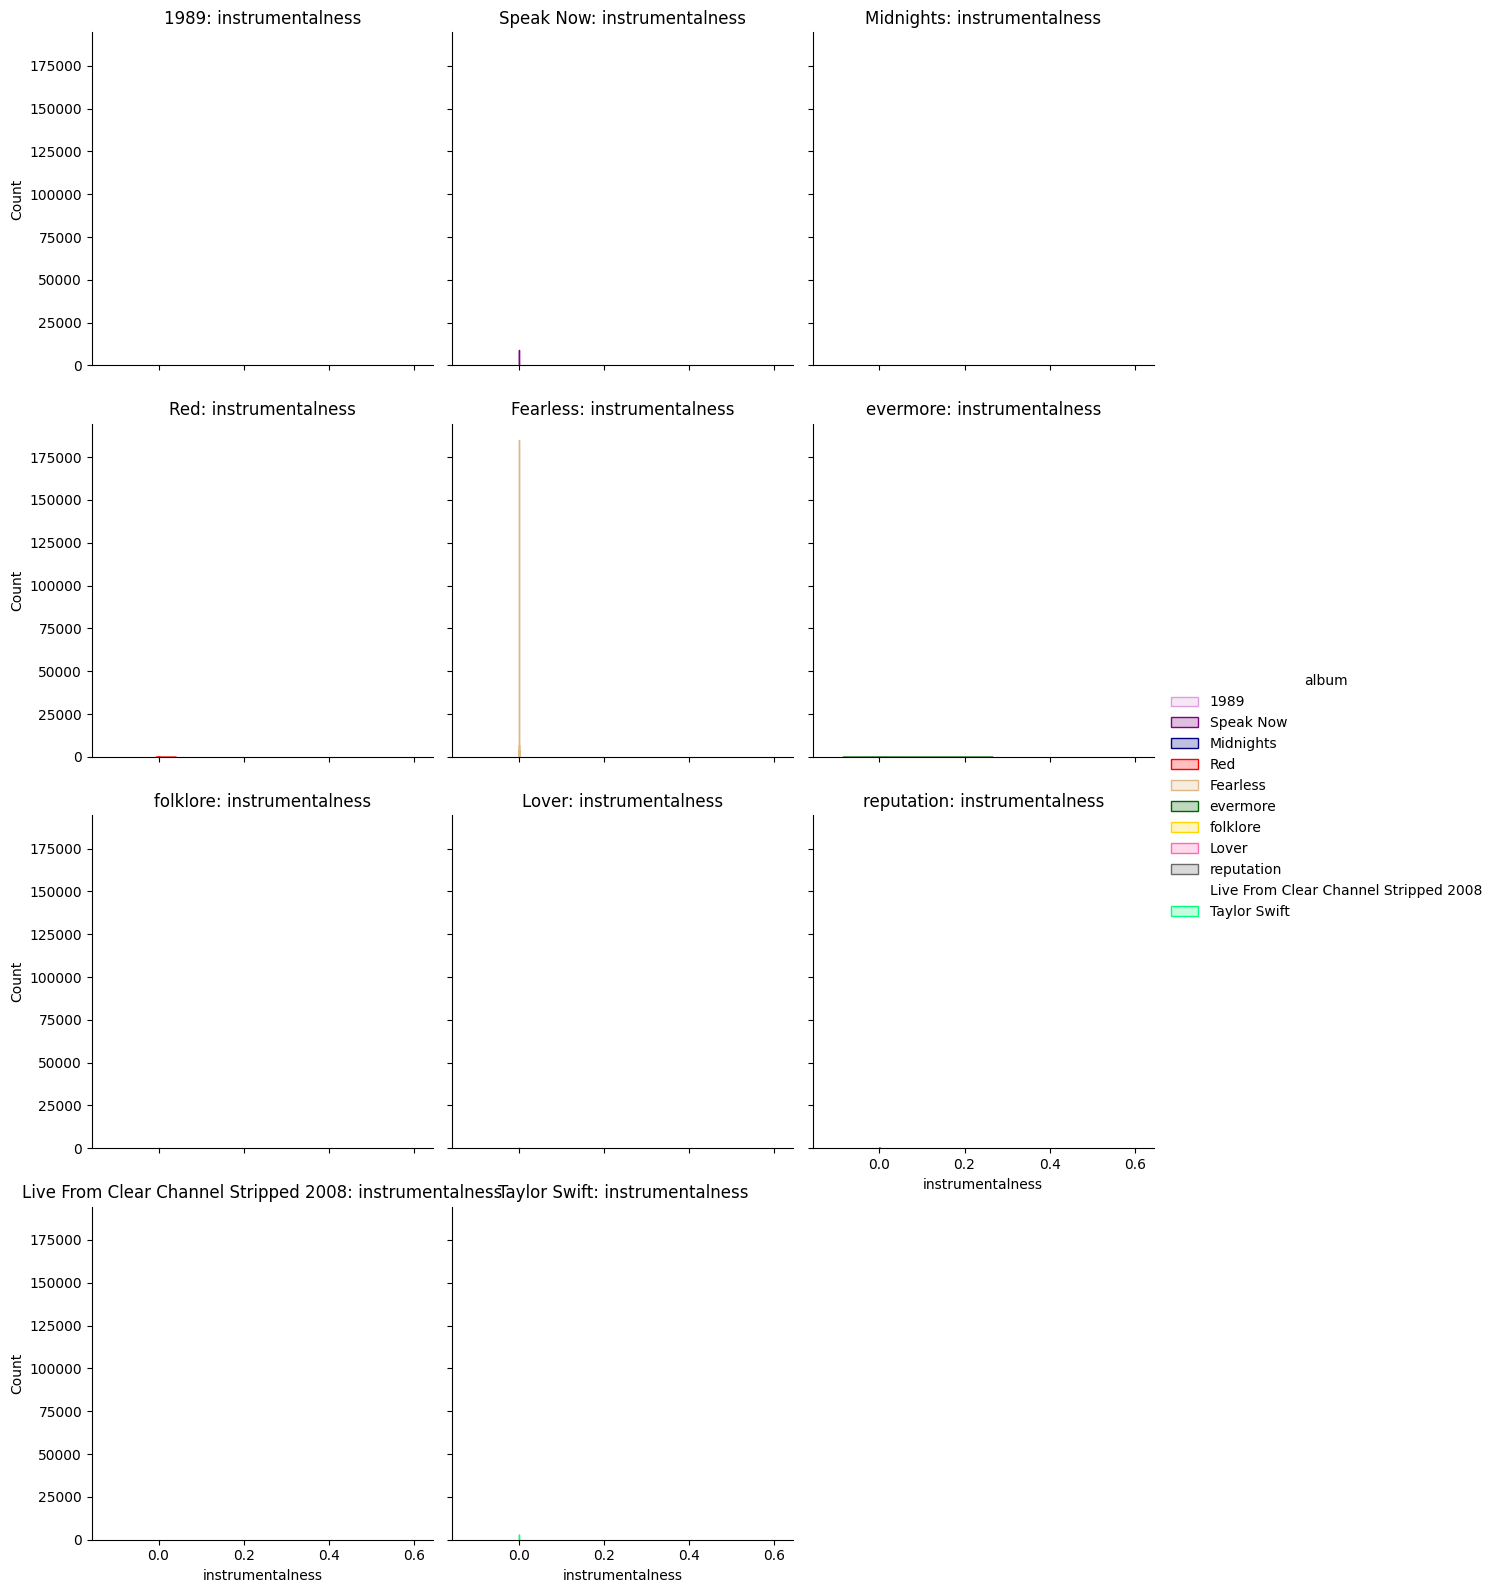

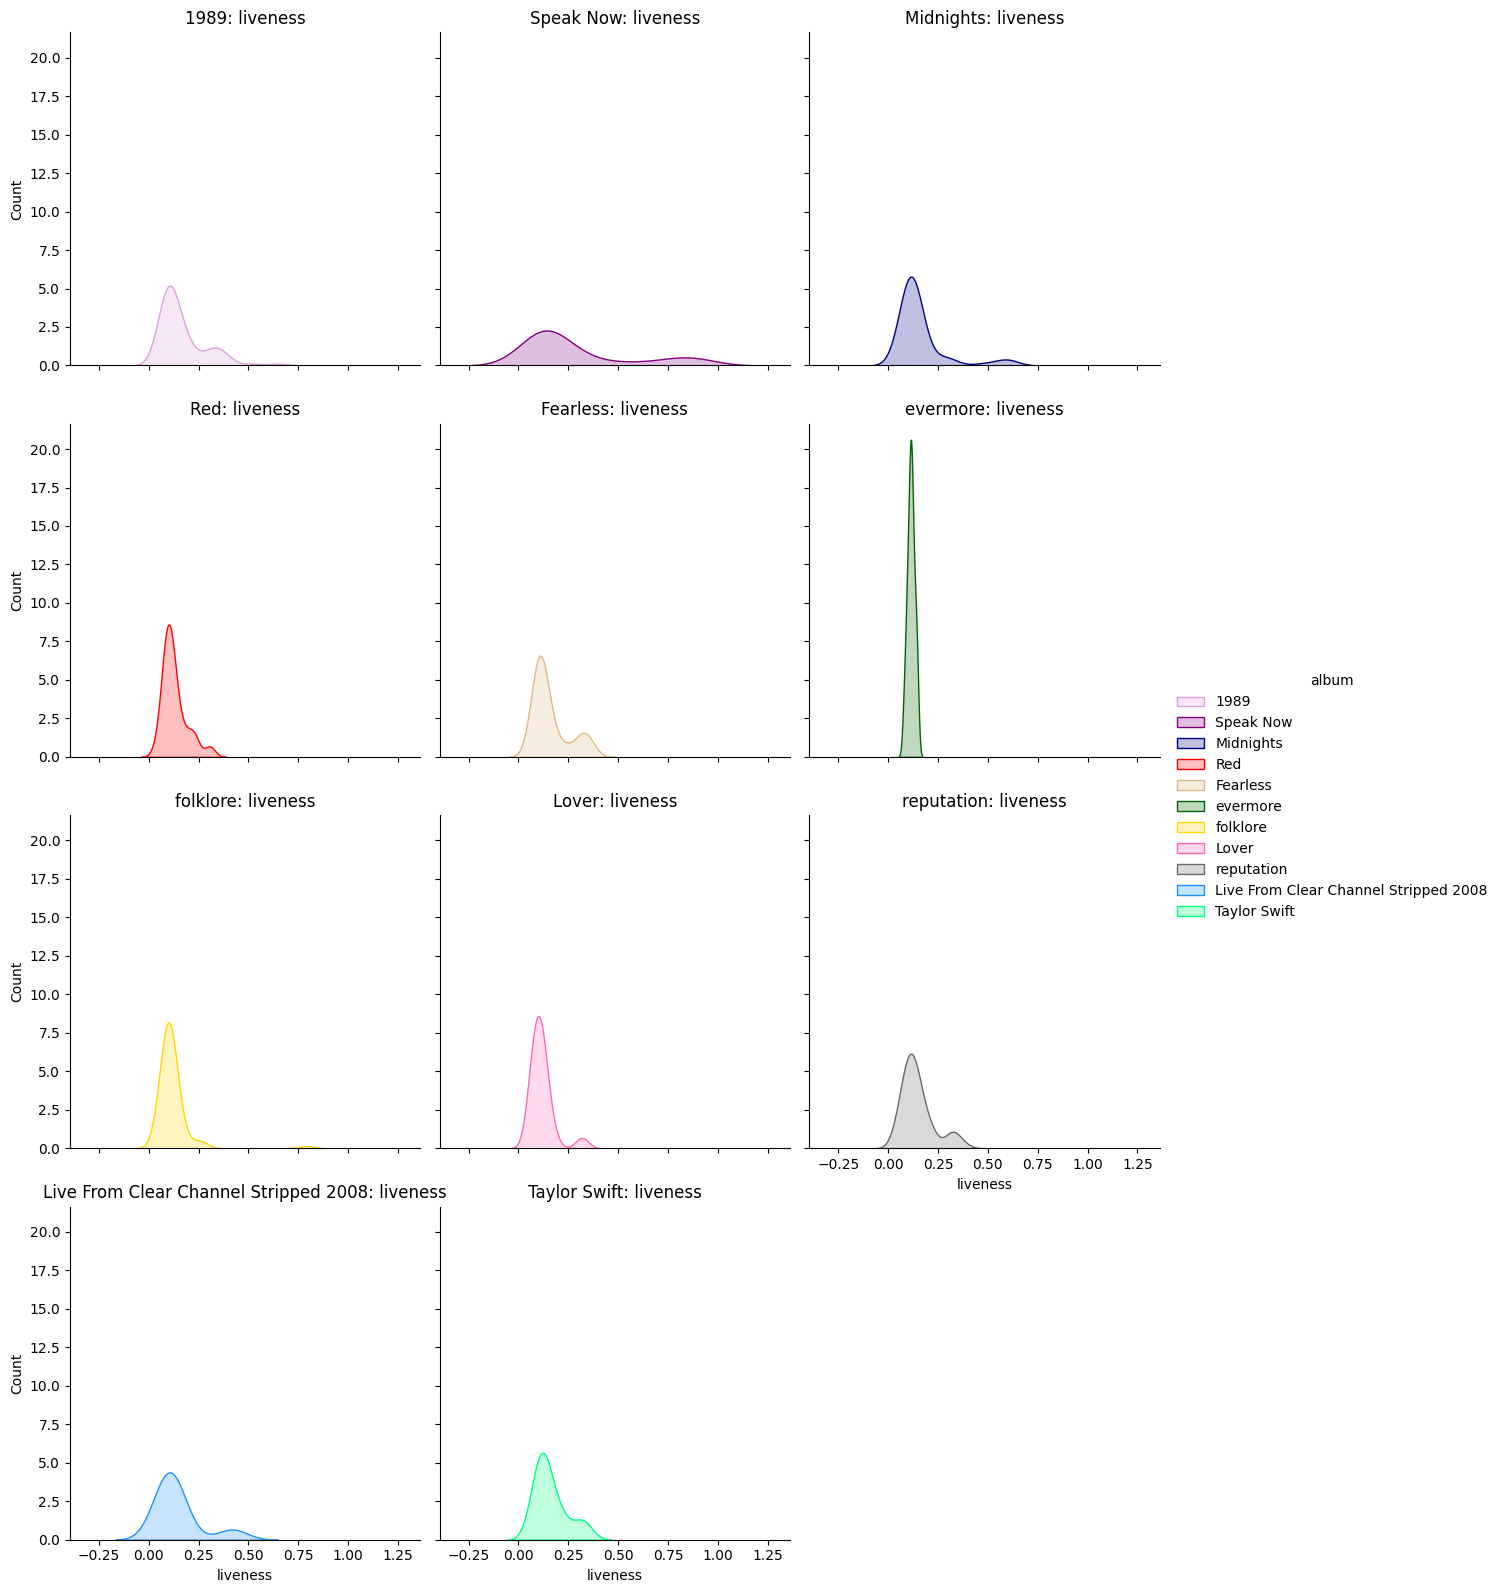

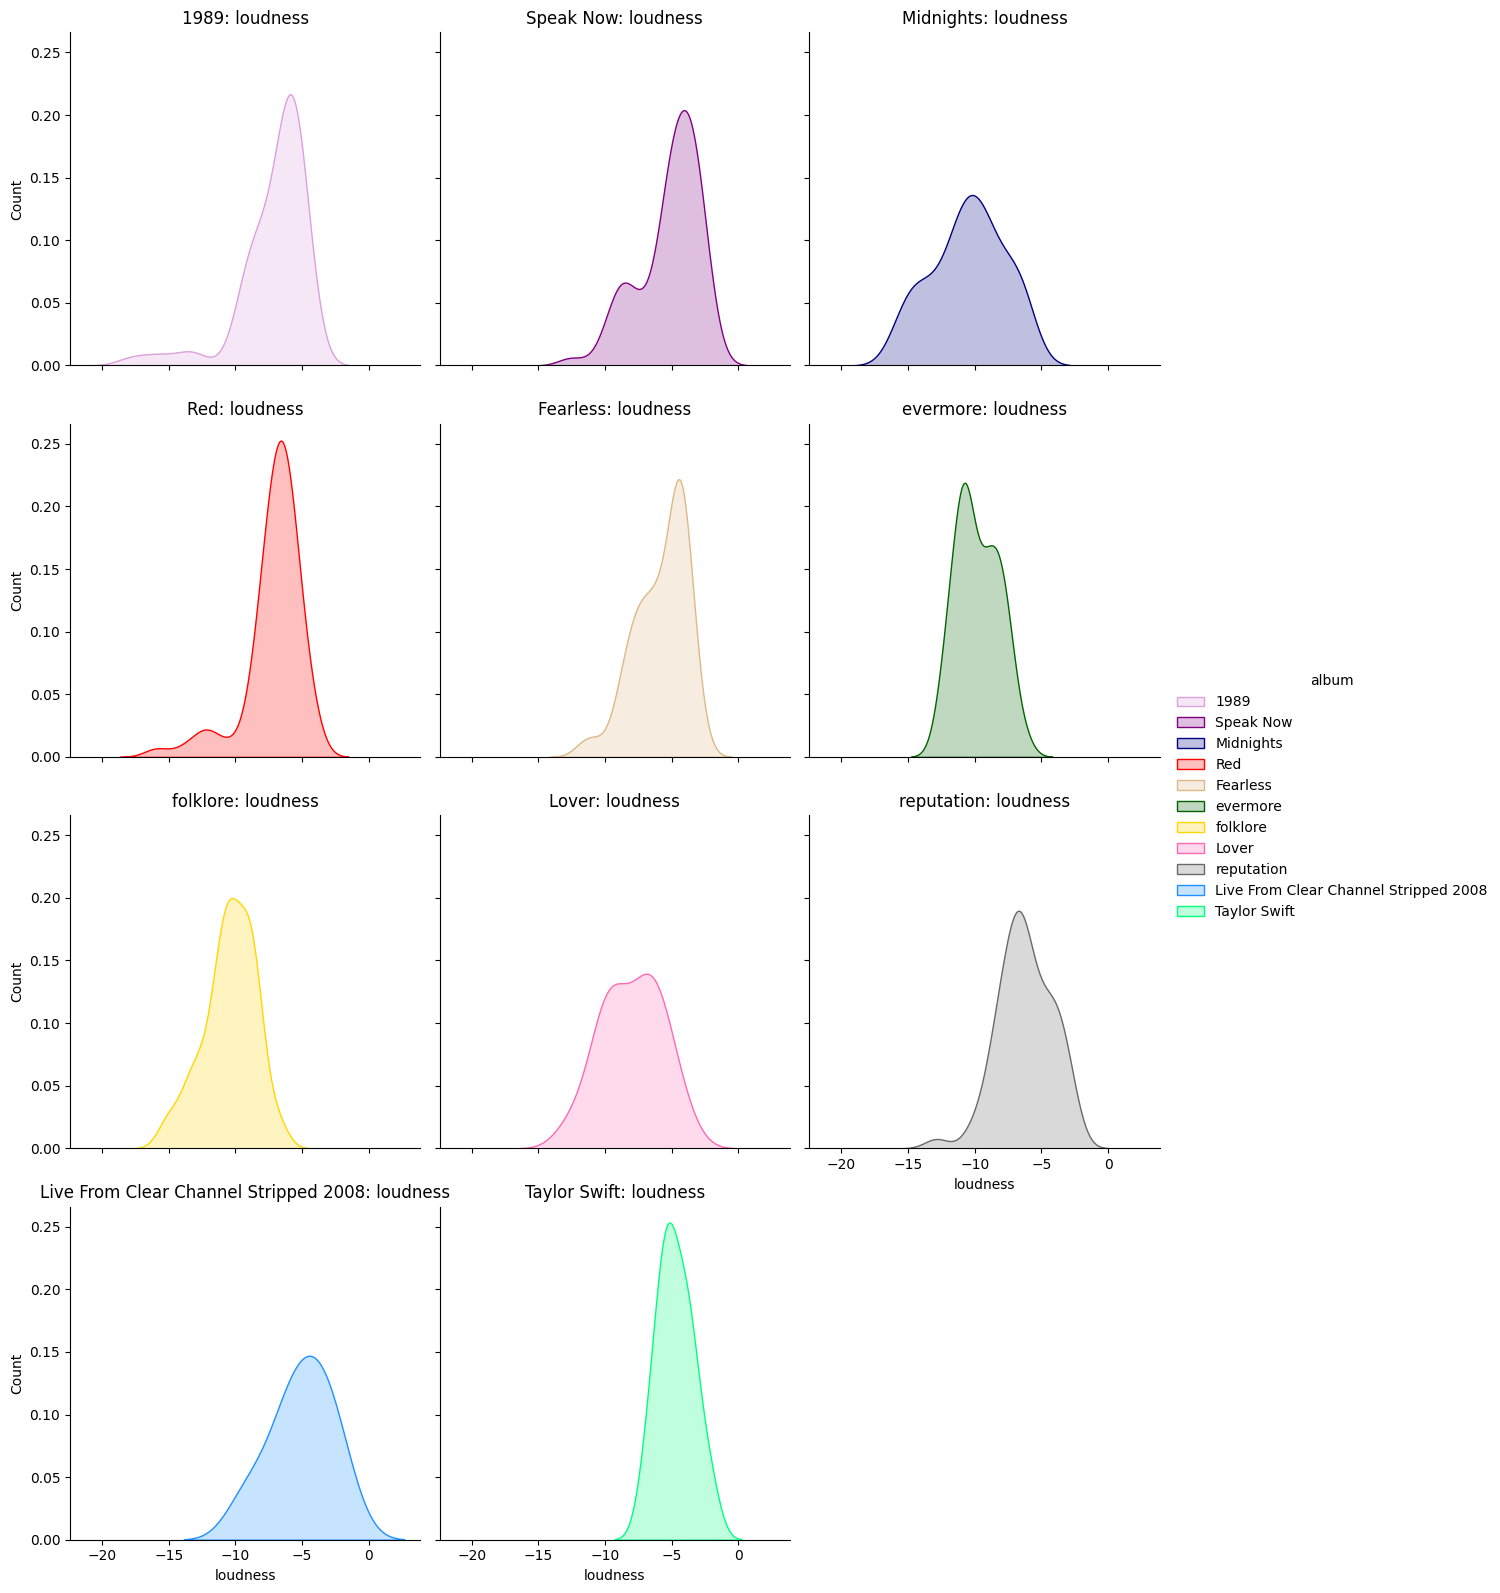

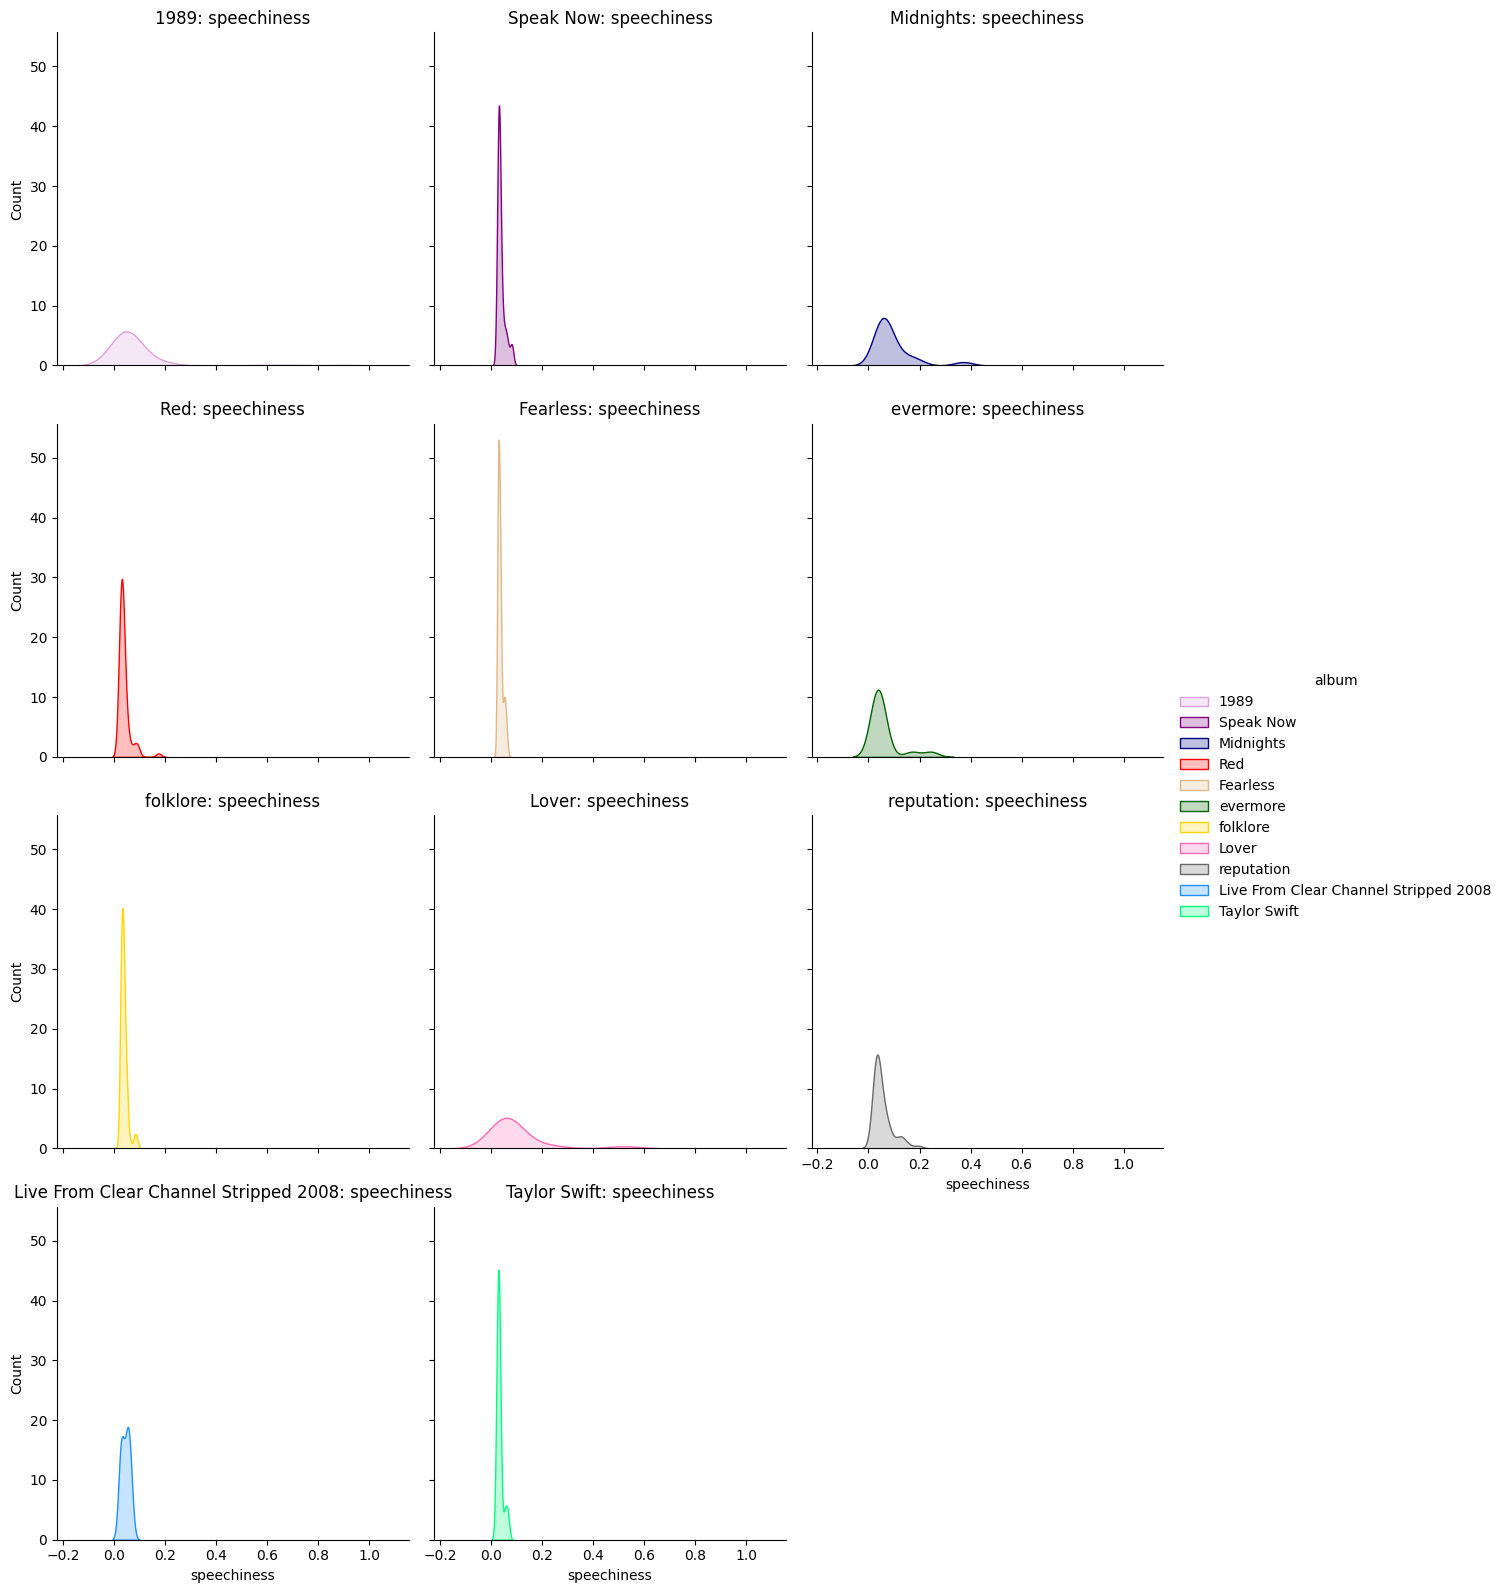

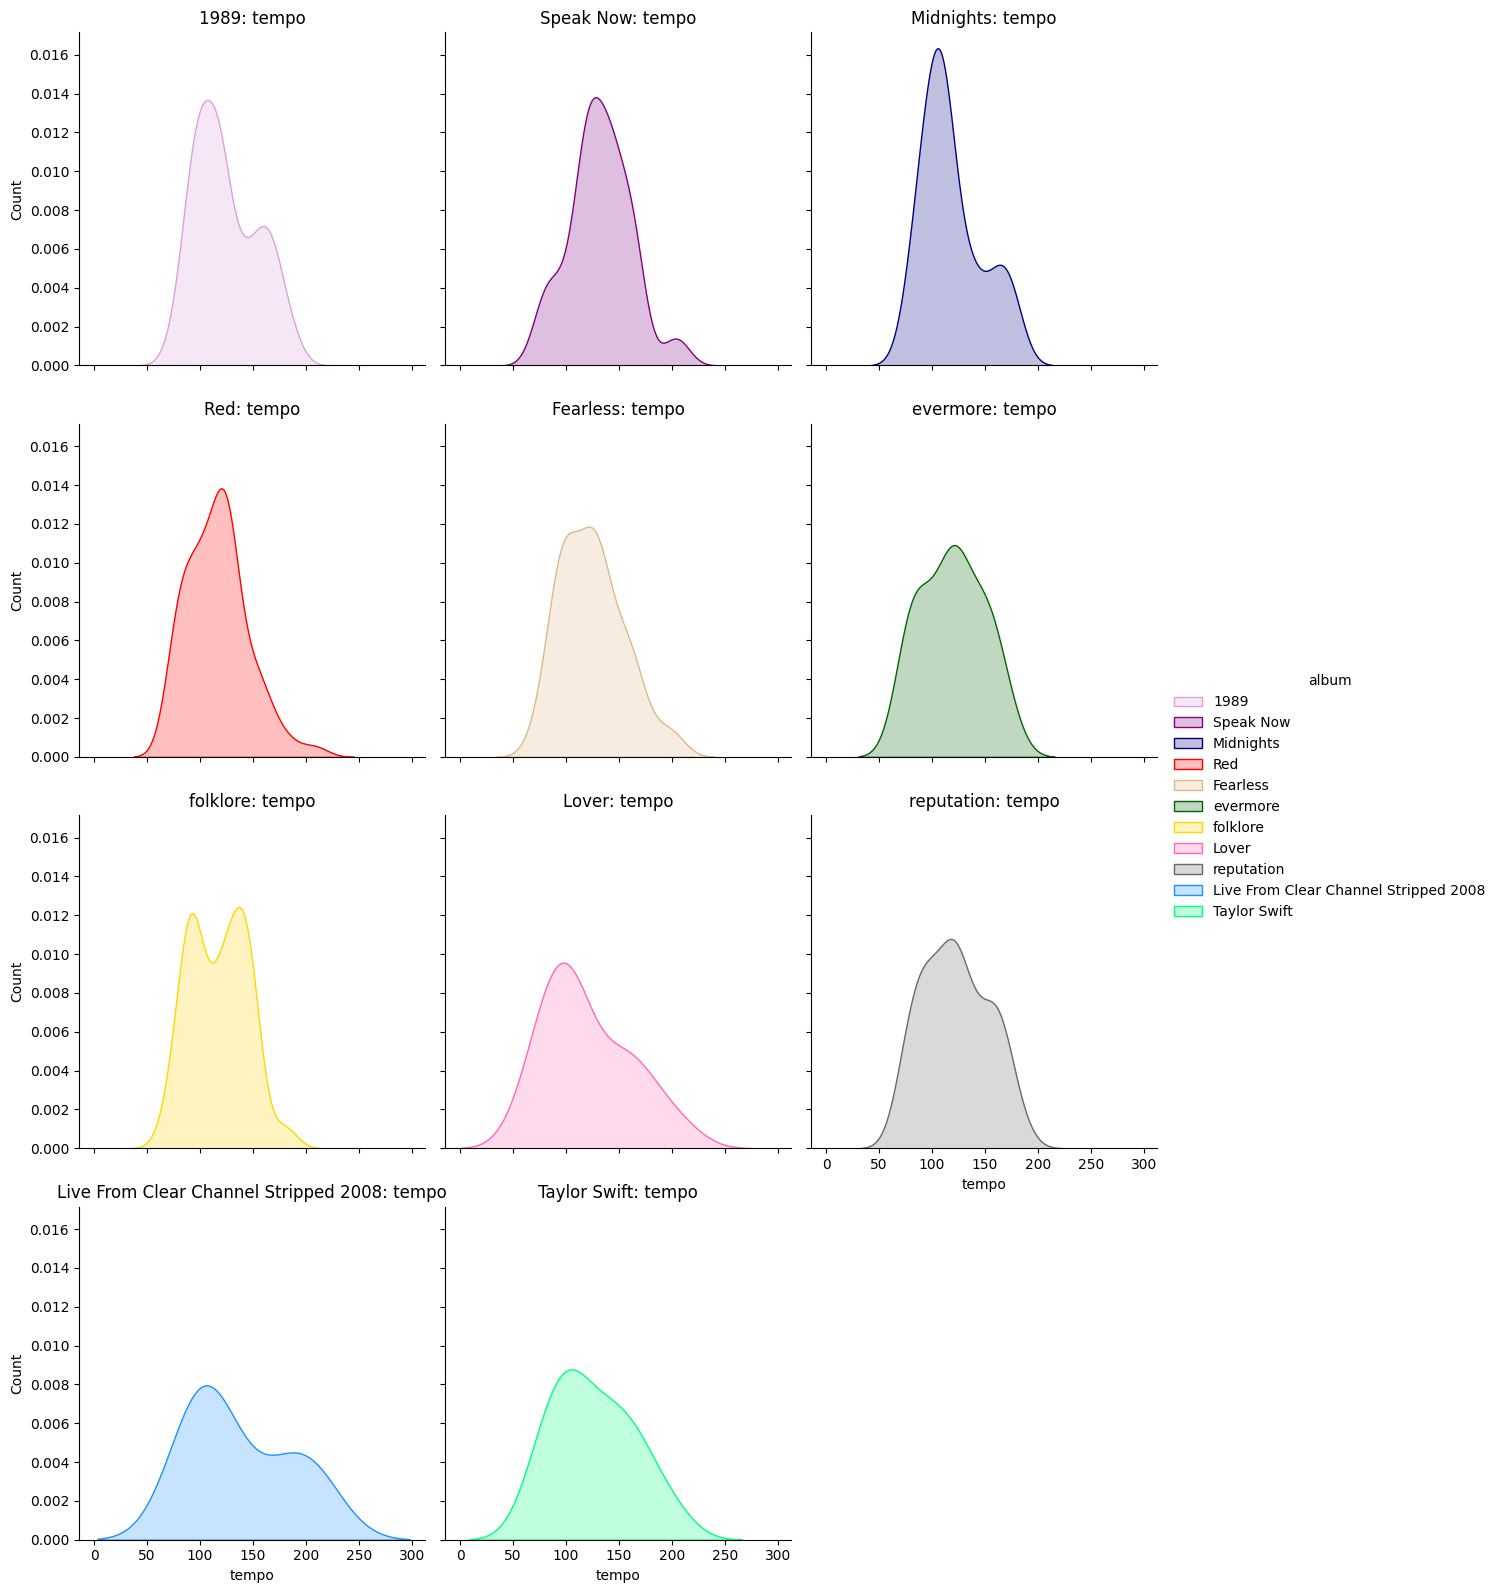

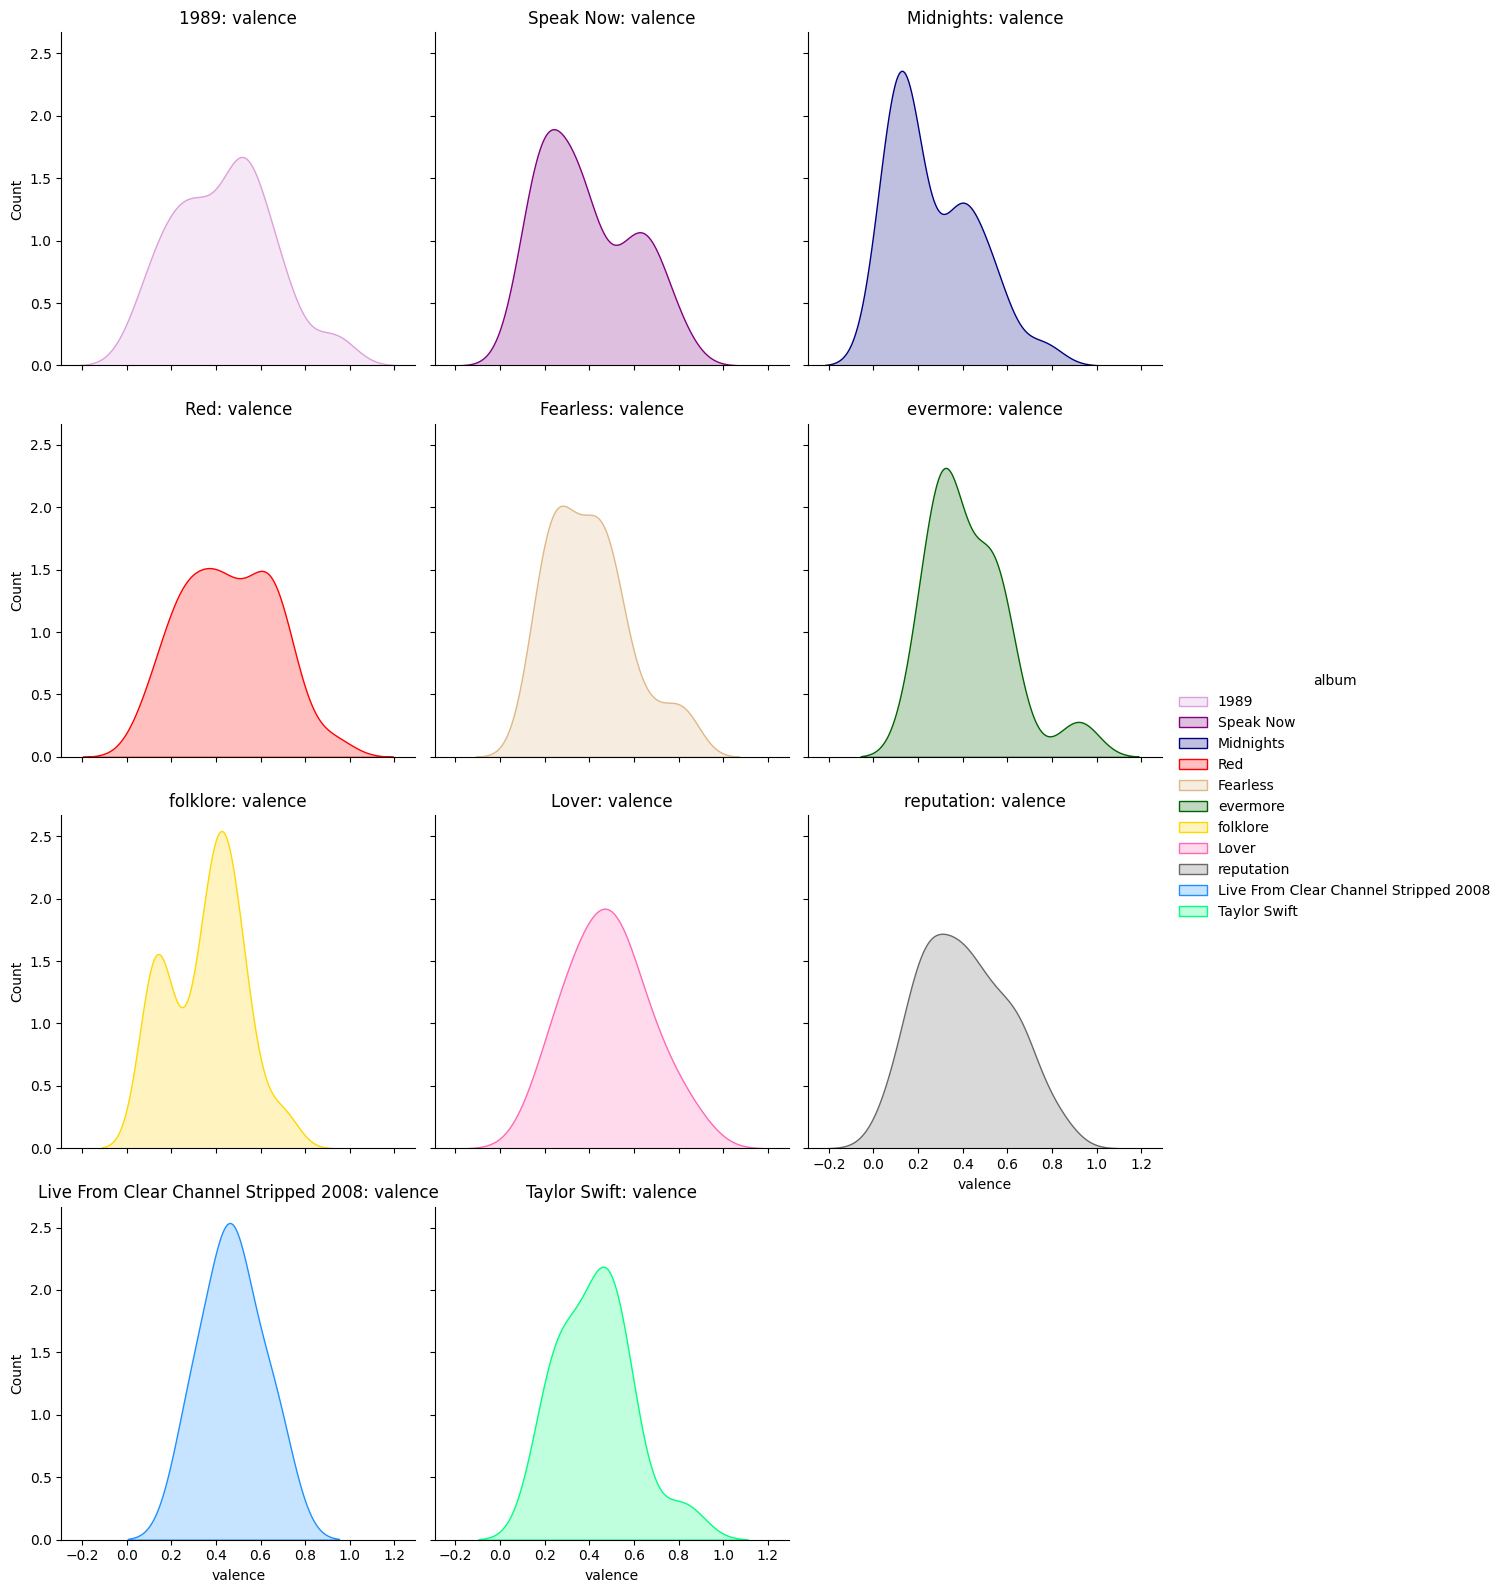

In [61]:
# Create a FacetGrid to illustrate the distributions of the musical features across the different albums
feature_names = df.columns[7:16]
# Manually increase the bottom margin to make room for x-label
grid.fig.subplots_adjust(bottom=0.2)
album_colors=['plum', 'purple', 'navy', 'red', 'burlywood', 'darkgreen', 'gold', 'hotpink', 'dimgray', 'dodgerblue', 'springgreen']

# Iterate over musical features and create a FacetGrid showing distribution of this feature over each album
for feature in feature_names:
    grid = sns.FacetGrid(df, col='album', col_wrap=3, height=4, sharey=True, hue='album', palette=album_colors)
    grid.map_dataframe(sns.kdeplot, x=feature, fill=True) # Kernel density plot highlighting feature distribution
    grid.set_axis_labels(feature, 'Count')

    # Customize the title for each subplot
    # The split function extracts the album name after the 'Album = ' string
    for ax in grid.axes.flat:
        ax.set_title(f"{ax.get_title().split('= ')[1]}: {feature}", fontsize=12) 
        
    grid.add_legend()

These kernel density distribution plots show how the 'instrumentalness' and 'speechiness' attributes do not have very much variance across songs. Therefore, these features will be omitted from the training data, as they do not seem to be too significant in determining the album's sound quality. The plot also demonstrates that there is considerable variance between the audio features of the different albums, which seems promising for the hypothesis that the album name can be predicted based on these distinctive sound attributes for each song.

Next, we will use a seaborn pairplot to visualize the correlations between the selected audio features. Multiple features being correlated with each other is known as *multicollinearity* and can cause problems for machine learning algorithms, such as [reduced accuracy of estimates, difficult ascertaining which features (or splits in decision trees) are most important, and overfitting](https://towardsdatascience.com/handling-multi-collinearity-6579eb99fd81#:~:text=Multi%2Dcollinearity%20results%20in%20the,increases%20the%20chances%20of%20detection.).

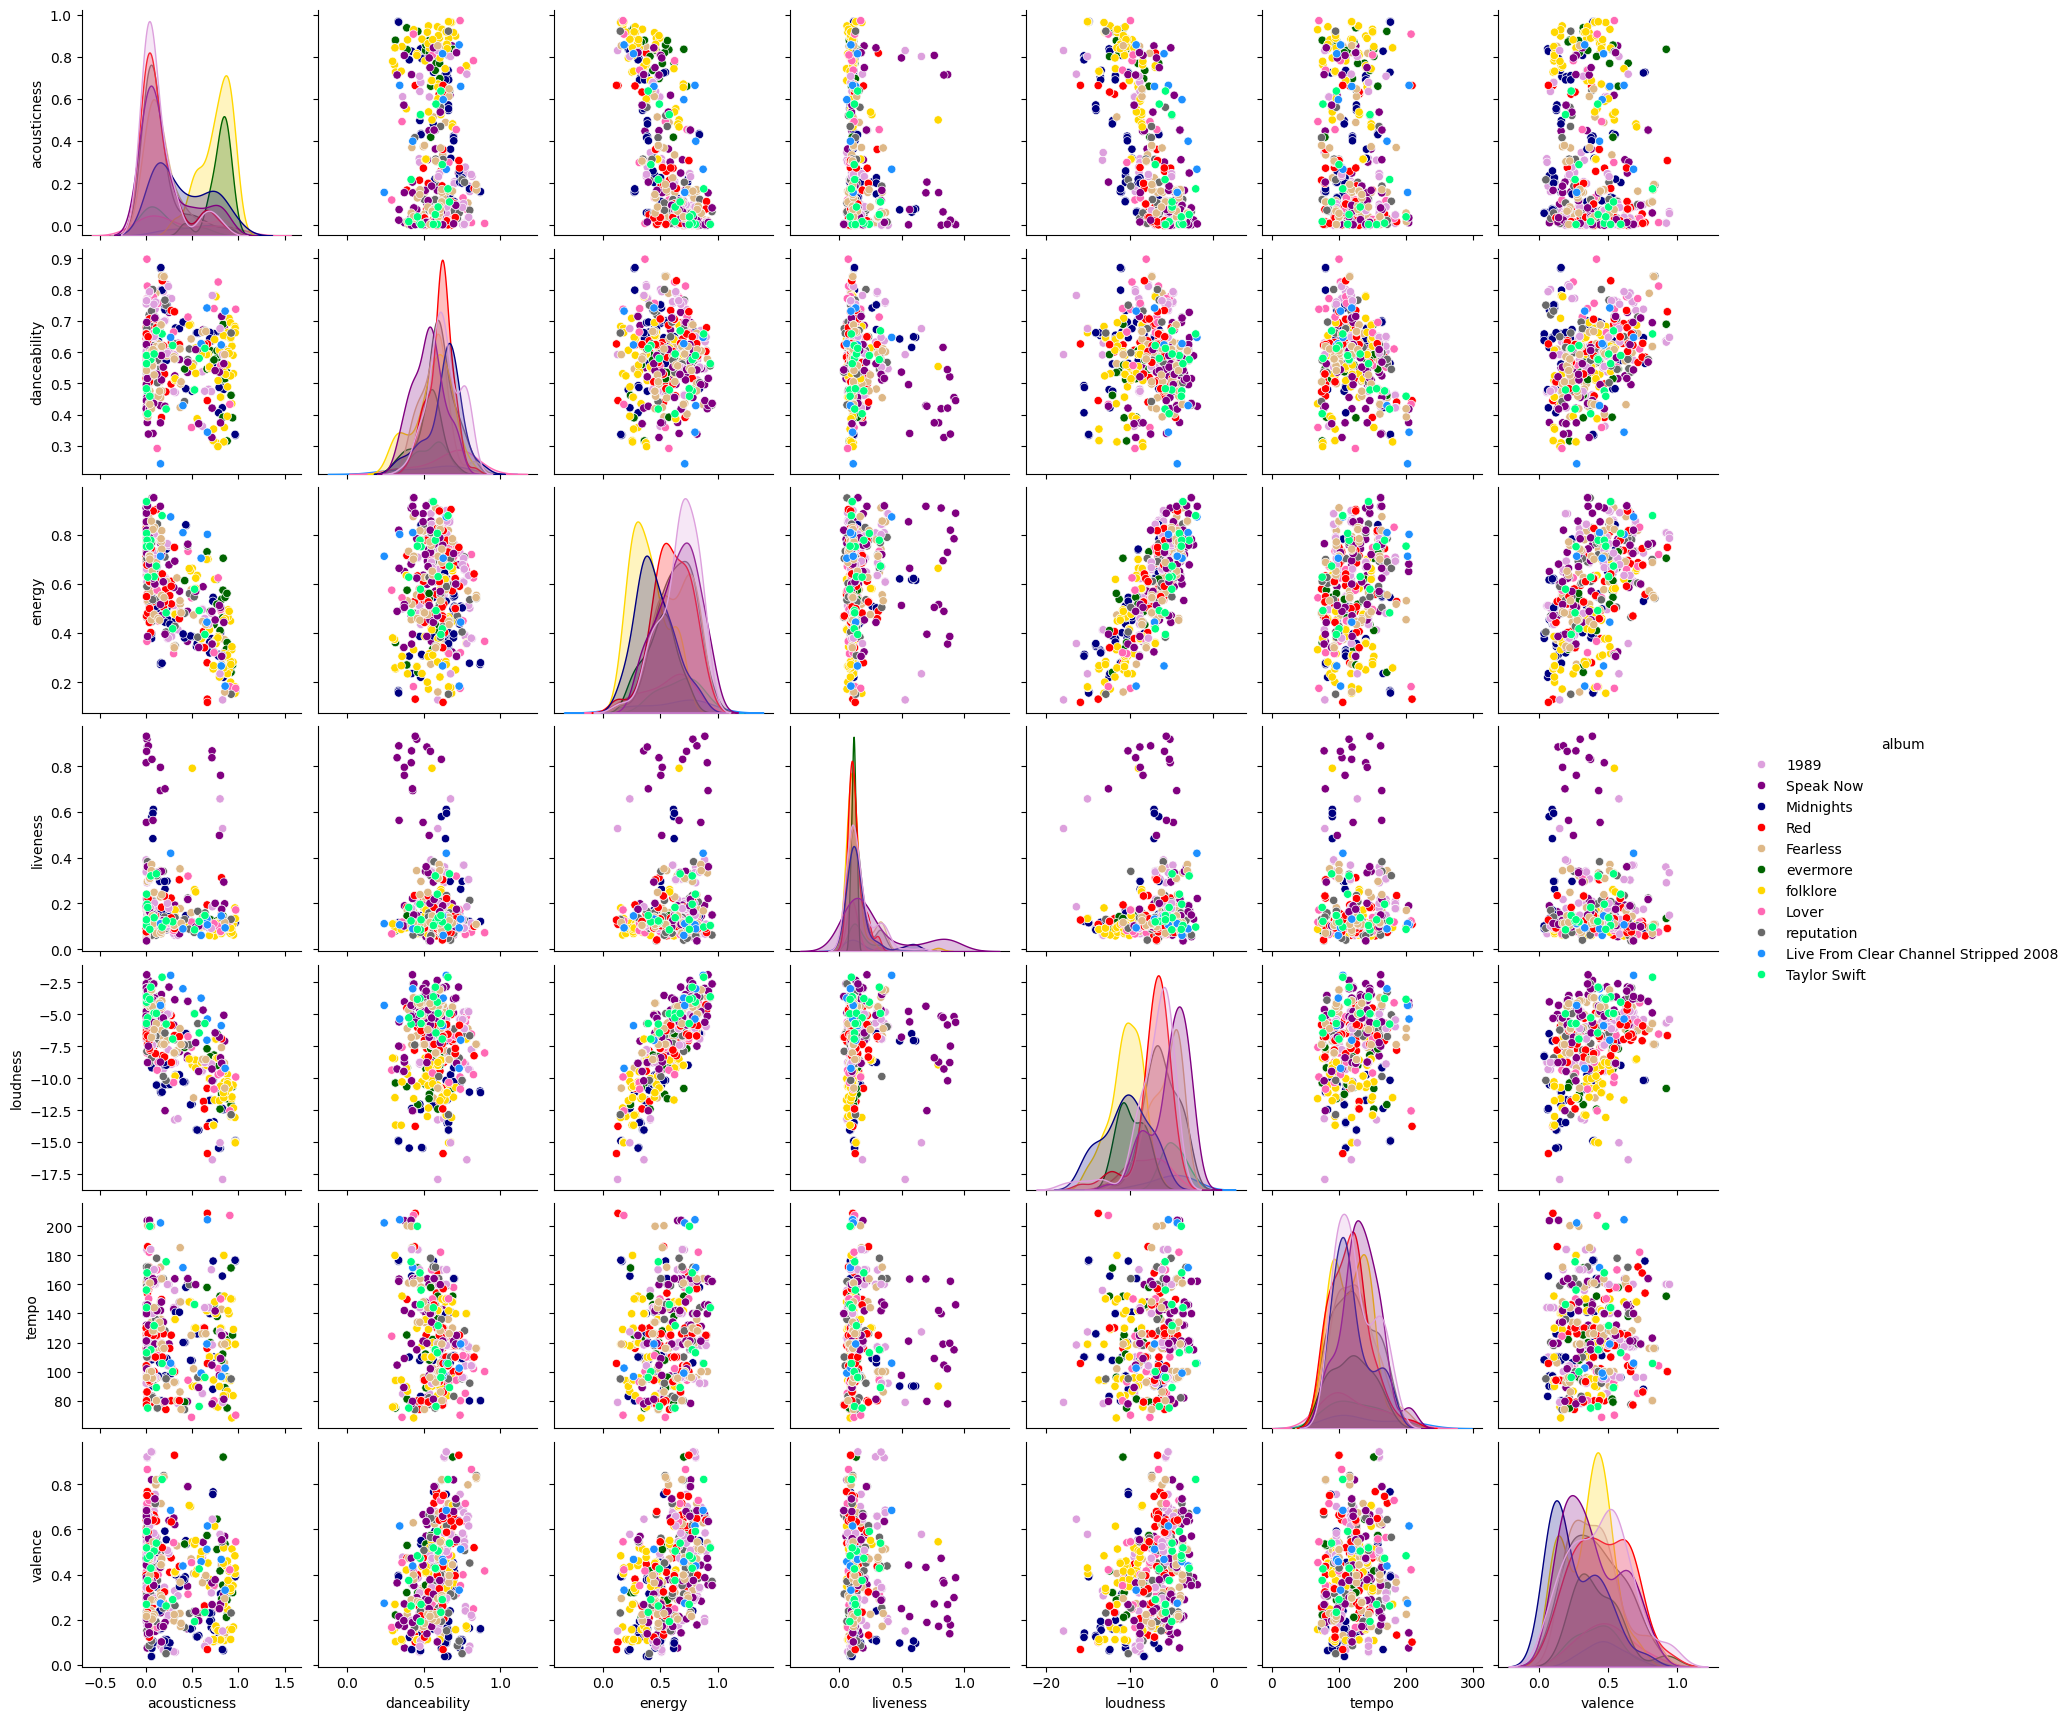

In [67]:
# Select the features excluding instrumentalness and speechiness following the findings from the above visualization
selected_features = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'tempo', 'valence']
sns.pairplot(data=df, hue='album', palette=album_colors,  vars=selected_features, kind='scatter')

This pairplot shows that there is no strong linear correlation between any pair of these features, therefore we will use these seven features to train the models.

## K-Nearest Neighbour Classification

Having selected the most relevant features based on the above analysis, we will now extracts ma features from the album labels into a features matrix and a target array visebelachine learnine pre-requisite for any supervised machine learning classification task.
As mentioned in the report, the values of the features will be scaled to try [to assign each feature an equal weight and to avoid larger-scaled features having disproportionately great influence on the neighbour selection](https://arxiv.org/ftp/arxiv/papers/1811/1811.05062.pdf).
</br>
</br>
[Reference 1](https://arxiv.org/ftp/arxiv/papers/1811/1811.05062.pdf)
[Reference 2](https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7)

In [70]:
# Extract the features matrix:
features_matrix = df.loc[:, selected_features] # loc function to index into all rows, only selected features
# Show the selected features matrix shape
print(features_matrix.shape)
features_matrix.head(10) 

(530, 7)


,acousticness,danceability,energy,liveness,loudness,tempo,valence
0,0.009420,0.757,0.610,0.3670,-4.840,116.998,0.685
1,0.088500,0.733,0.733,0.1680,-5.376,96.057,0.701
2,0.000421,0.511,0.822,0.0899,-4.785,94.868,0.305
3,0.000537,0.545,0.885,0.3850,-5.968,92.021,0.206
4,0.000656,0.588,0.721,0.1310,-5.579,96.997,0.520
5,0.012100,0.636,0.808,0.3590,-5.693,160.058,0.917
6,0.003540,0.670,0.858,0.0687,-6.528,118.009,0.539
7,0.036200,0.618,0.683,0.3050,-6.438,169.971,0.363
8,0.043600,0.589,0.674,0.1120,-7.480,139.985,0.514
9,0.001960,0.758,0.691,0.0939,-5.798,119.997,0.538


In [71]:
# Now extract the 'target array' from the datarame, i.e. album name (the label we want to predict)
target_array = df['album']
target_array.head(10)

0    1989
1    1989
2    1989
3    1989
4    1989
5    1989
6    1989
7    1989
8    1989
9    1989
Name: album, dtype: object

In [73]:
# Function to compute z-scores for scaled features matrix to enable Euclidian distance calculations for k-NN
def normalize(col): # takes each feature column as input argument
    mean = col.mean() 
    std = col.std()
    return ((col-mean) / std) # apply z-score formula to values in the column

# Apply to features matrix per column
scaled_features_matrix = features_matrix.apply(normalize) # each value is now that feature's nr of std deviations left or right from the mean
scaled_features_matrix.head(10) # 

,acousticness,danceability,energy,liveness,loudness,tempo,valence
0,-0.947357,1.517974,0.184744,1.430510,0.906906,-0.177809,1.441069
1,-0.705554,1.305812,0.826824,0.031689,0.724534,-0.875836,1.521234
2,-0.974873,-0.656684,1.291418,-0.517296,0.925620,-0.915469,-0.462847
3,-0.974518,-0.356121,1.620289,1.557036,0.523107,-1.010368,-0.958868
4,-0.974154,0.024002,0.764182,-0.228394,0.655464,-0.844503,0.614369
5,-0.939162,0.448325,1.218336,1.374276,0.616675,1.257512,2.603461
6,-0.965336,0.748888,1.479344,-0.666316,0.332569,-0.144109,0.709564
7,-0.865471,0.289204,0.565816,0.994696,0.363191,1.587942,-0.172250
8,-0.842845,0.032842,0.518835,-0.361949,0.008654,0.588418,0.584307
9,-0.970167,1.526814,0.607577,-0.489179,0.580949,-0.077843,0.704554


### k-NN Implementation from Scratch

In [74]:
# References to tutorials for implementing this algorithm (although I adapted it to get weights of each neighbor):
# Reference: https://kenzotakahashi.github.io/k-nearest-neighbor-from-scratch-in-python.html
# Reference: https://medium.com/lukasfrei/machine-learning-from-scratch-knn-b018eaab53e3
# Reference: https://insidelearningmachines.com/knn_algorithm_in_python_from_scratch/

# First create an auxiliary function used to calculate the Euclidian difference between two samples or rows, each containing n features
def euclidianDistance(sample1, sample2):
    # First calculate the SQUARED difference (this stops negative and positive distances from cancelling out) between the values of 
    # each feature/attribute for the two samples. We will do this by taking advantage of NumPy's vectorized operations.
    differences_between_sample_features = sample2 - sample1
    # Square these differences.
    squared_differences_between_sample_features = np.power(differences_between_sample_features, 2)
    # Sum up the squared differences now!
    sum_squared_differences_between_sample_features = np.sum(squared_differences_between_sample_features)
    # Return the square root of the summation.
    return np.sqrt(sum_squared_differences_between_sample_features)

# Constructs a new Python class for the k-NN model.
# The class accepts only one input parameter upon instantiation, which is 'k'.
# This is the number of neighbours to select and weigh for each test sample.
class KNearestNeighbourClassifier:
    # Constructor function: takes in 1 input arg which is an integer storing k (nr of nearest neighbours)
    def __init__(self, k): 
        # Set k or nr of neighbors
        self.k = k
        # Initialize the training data features matrix (X_train) and labels (y_train) to empty arrays
        self.X_train = np.array([])
        self.y_train = np.array([])
        # This array stores the k-weights for each of the distances for the k-closest neighbours
        # I.e. the closest neighbour is multiplied by 1, the second-closest neighbour by 1/2, the third-closest by 1/3 in the case of k=3.
        # The weights for each album-label mentioned in the k-closest neighbours are then summed up, and the label with the greatest weight is predicted.
        self.weights_array = 1 / (np.arange(self.k) + 1)
        # This will store and return the y_pred/predicted album labels for the test samples after the predict() method is called
        self.predicted_labels = []
        
    # 'fit' doesn't do anything because this is a lazy learning algorithm as explained above
    # It merely STORES the features matrix X and target labels Y for the training data, ready to use when 'predict' is called.
    def fit(self, X_train, y_train):
        # Convert features and target vector from dataframes/Series to np array
        self.X_train = X_train # Store the features-matrix for the training data
        self.y_train = y_train # Store the labels/target vector for the training data

    # Selects the k-nearest neighbors for each test sample in X_test, and then selects the label of the most heavily-weighted neighbor
    def predict(self, X_test):
        self.predicted_labels = []
        # Throw an Exception if there was no training data entered.
        # Ref: https://insidelearningmachines.com/knn_algorithm_in_python_from_scratch/
        if (self.X_train.size == 0) or (self.y_train.size == 0): # checks that training data not empty
            raise Exception('Error - Model is not trained: call "fit" on training data prior to "predict",')
        # Iterate over each test sample [i.e. new song row] in the X_test samples array
        for test_sample in X_test:
            # Initializes an empty list/array which will contain the distances for THIS specific test sample to every one of the training samples.
            test_sample_distances = []
            # Iterates over the training data instances to measure the Euclidian distance between this iteration of test sample
            # and all of the training samples in X_train. 'j' represents the index of every sample in X_train [a row representing a stored song].
            for j in range(len(self.X_train)):
                # Calculate the floating-point number representing the distance between this test sample and this train sample indexed at row j
                # Use index slicing to get 'j' & all cols (features) from the X_train features matrix
                test_sample_distance = euclidianDistance(np.array(self.X_train[j, :]) , test_sample)  
                # Appends the new (floating-point) distance to the list of distances between this test sample and each one of the training samples
                test_sample_distances.append(test_sample_distance) 
            # Converts the array of distances for this test sample to NumPy array: this enables the useful NumPy function argsort
            test_sample_distances = np.array(test_sample_distances)
    
            # NumPy argsort: sorts the array of distances and returns the indices of the elements in the array that would result in the sorted array
            # Reference: https://www.geeksforgeeks.org/numpy-argsort-in-python/
            indices_of_closest_neighbours = np.argsort(test_sample_distances)[:self.k]
            # Extract the sorted distances from the array of distances using the argsort indexes
            closest_distances = test_sample_distances[indices_of_closest_neighbours]
            # Then multiply these distances of the k-closest neighbours by the np weights array using element-wise, vectorized multiplication
            weighted_closest_distances = closest_distances * self.weights_array
            # Use the indices of the closest neighbours to access the actual labels/album names of these neighbours
            labels = self.y_train[indices_of_closest_neighbours]
            # Create a dict which will store:
            # - Key: each album/label for the top k neighbours
            # - Value: the summed total of its weighted distance from test sample
            label_weights = {}
            # Pair the album labels with their weighted distances from the sample into tuples using the zip() function.
            # Then iterate over the paired tuples.
            # Reference: https://www.w3schools.com/python/ref_func_zip.asp
            for label, weighted_distance in zip(labels, weighted_closest_distances):
                # If the album name (the 'label') is not yet in the label_weight dicts, add it as a key, with the weighted distance as the value
                if label in label_weights:
                    label_weights[label] += weighted_distance
                # If the album name is already in the dict, sum the new weighted distance to the existing weighted distance for that album
                else:
                    label_weights[label] = weighted_distance
            # Extract the label (dict key) associated with the max weight [value] for that test sample
            # Reference: https://datagy.io/python-get-dictionary-key-with-max-value/#:~:text=The%20simplest%20way%20to%20get,maximum%20value%20of%20any%20iterable.&text=What%20we%20can%20see%20here,max%20value%20of%20that%20iterable.
            predicted_label = max(label_weights, key=label_weights.get)
            # Append the label to the list of predictions for the test samples
            self.predicted_labels.append(predicted_label)
        # Returns the completed list of predicted labels for all the test samples
        return self.predicted_labels
            

#### Nested-Cross Validation for Evaluating the Performance of the k-Nearest Neighbour Algorithm on Album Prediction

In this section, several functions will be defined to enable five-fold nested cross-validation to evaluate the performance of the k-NN algorithm. There are several justifications for this decision.
1. Firstly, this dataset is not very large, and it is imbalanced (some albums have a much greater number of songs than others). Therefore, to make the maximum use of the data, cross-validation allows different combinations of songs to be used for training and testing for each 'fold'. This increases the probability of songs from each album being represented in the training sets.
2. Secondly, cross-validation reduces overfitting: when a model is very successful at classifying training data because it learns the details of the features in the training set too well, but fails to generalize beyond these findings when applied to new data. Cross-validation enables the model to be trained on different combinations of rows in the dataset, therefore exposing it to more nuanced and general pattterns, rather than relying on the evaluation of the outcome of only one set of data.
3. Finally, we could achieve the above aim solely by using cross-validation without nesting. However, nested cross-validation allows us to tune the model to find the best value for the *k* hyperparameter. For each 'fold' (new train/test split), the training set is further divided into a training and validation set, which is tested using a range of values for *k*. The metric used to decide the optimal value of *k* for each nested fold will be the *f1 score*, which is the 'harmonic mean' of the precision and recall metric. [Recall is defined as the ratio between true positives, i.e. correctly identified positive cases, and all the instances of that album, and is given by the formula **True_Positives/(True_Positives + False_Negatives)**](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20can%20be%20used%20when,to%20evaluate%20our%20model%20on.). In other words, it measures the proportion of songs from an album which the algorithm correctly identified as belonging to that album. [Precision measures the *correct* proportion of labels from all the predicted labels for an album, and is defined by the formula **True_Positives/(True_Positives + False_Negatives)**]. Essentially, it is a way of quantifying the probability of how correct a certain prediction for an album is. In contrast, accuracy is the propotion of all correct classifications (negative and positive) out of all the classifications. The problem with using accuracy as a comparison metric here is that ['accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes'.](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20can%20be%20used%20when,to%20evaluate%20our%20model%20on.). In this case, we have imbalanced classes with some albums being over-represented, therefore F1 is a better measure of the algorithm's performance here. Accuracy can actually be very misleading if you have uneven classes, as high accuracy could be achieved just by predicting the majority class all the time, which in this case, is the album 1989. [This is a phenomenon which has been recognized as the 'Accuracy Paradox'.](https://proclusacademy.com/blog/explainer/precision-recall-f1-score-classification-models/).


In [122]:
# Perform n-fold nested cross validation to find the best hyperparameter/value of 'k'
# Divide the dataset into x 'folds' (x different train-test sets comprised of different inputs and labels for the training and test data)

# Import f1 metric
from sklearn.metrics import f1_score
# Import confusion matrix class for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Summary of metrics to evaluate the model
from sklearn.metrics import classification_report

# Create one fold with 80% training data and 20% test data split
def createFold(X, y):
    # Randomly shuffles the indices of the sample data.
    random_indices = np.random.permutation(len(X))
    # Calculate the count for 80% of samples (train).
    nr_training_samples = round(len(X) * 0.8)
    # Calculate the count for 20% of samples (test).
    nr_test_samples = len(X) - nr_training_samples
    # Get the indices used to extract the train and test data
    train_indices = random_indices[:nr_training_samples]
    test_indices = random_indices[nr_training_samples:]
    # Extract the training and test inputs and training and test labels using the random indices for this fold.
    X_train, y_train, X_test, y_test = X[train_indices], y[train_indices], X[test_indices], y[test_indices]
    return X_train, y_train, X_test, y_test

# Takes in a training set features matrix (X) and target array of album names (y).
# Runs cross-validation on 'nr_outer_folds' input parameter combinations of train-test data.
# While validating on [1...'nr_inner_folds'] values of k (nearest neighbours) for each outer fold.
# Then, selects value of k with greatest f1 score, and uses this value of k nearest neighbours to test on the outer-fold train-test combination
def kNearestNeighbour_CrossValidation(X, y, nr_outer_folds, nr_inner_folds):
    # Stores the optimal k hyperparameter for each outer fold
    best_k_values_per_fold = []
    # Stores f1 scores for each outer fold
    f1_scores_per_fold = []
    # Confusion matrix for each fold
    confusion_matrices = []
    # Confusion matrix DataFrame with album labels for each fold
    confusion_matrix_dfs = []
    # Classification reports per fod
    classification_reports = []
    # Cross-validate by dividing data into different train-test splits 'nr_outer_folds' times...
    for i in range(nr_outer_folds):
        # Create the new combination of train-test data for this fold
        X1_train, y1_train, X1_test, y1_test = createFold(X, y)
        # Get the training set created in the above line of code and use it to split further into a training-and-validation set for hyperparameter tests
        X2_train, y2_train, X2_test, y2_test = createFold(X1_train, y1_train)
        # Stores the accuracies for each hyperparameter run on the validation set
        inner_fold_scores = []
        # j iterates from 1 to 'nr_inner_folds + 1' to iterate over 1 to 'nr_inner_folds' values for the k hyperparameter
        for j in range(1, nr_inner_folds + 1):
            # Create new instance of k-NN classifier that looks at j nearest neighbours
            knn = KNearestNeighbourClassifier(j)
            # Insert the training set for the inner fold
            knn.fit(X2_train, y2_train)
            # Test on the validation set for the inner fold
            y_validation_pred = knn.predict(X2_test)
            # Store the accuracy for this value of k-nearest neighbours
            # Micro average keyword argument parameter is the most basic kind of f1 score: simply counts true positives, false negatives and false positives.
            inner_fold_scores.append(f1_score(y2_test, y_validation_pred, average='micro')) 
        inner_fold_scores = np.array(inner_fold_scores)
        # Get the value of k nearest neighbours which performed best with the highest accuracy score
        best_k_value = np.argmax(inner_fold_scores) + 1 # Indexed with 0, so add 1 to get back to k
        # Train and test the outer-fold train-test set using this optimal hyperparameter
        outer_knn = KNearestNeighbourClassifier(best_k_value)
        outer_knn.fit(X1_train, y1_train)
        y1_pred = outer_knn.predict(X1_test)
        # Store the accuracy and precision for the outer fold in the function-scope arrays defined at the beginning of the function
        f1 = f1_score(y1_test, y1_pred, average='micro')
        f1_scores_per_fold.append(f1)
        best_k_values_per_fold.append(best_k_value)
        # Store the album names in order from the target array, to use for confusion matrix
        album_names = np.unique(y1_test)
        # Create confusion matrix for this fold:
        c_matrix = confusion_matrix(y1_test, y1_pred, labels=album_names)
        confusion_matrices.append(c_matrix)
        confusion_matrix_dfs.append(pd.DataFrame(c_matrix, index=album_names, columns=album_names))
        # Get the sklearn classification report summary from sklearn
        classif_report = classification_report(
            y1_test,
            y1_pred,
            output_dict=True, # Convert to dictionary
            labels=album_names,
            target_names=album_names,
            zero_division=0.0,) # If divide by 0, set metric to 0
        classification_reports.append(classif_report)
    return np.array(best_k_values_per_fold), np.array(f1_scores_per_fold), confusion_matrices, confusion_matrix_dfs, classification_reports

best_k_values_per_fold, f1_scores_per_fold, confusion_matrices, confusion_matrix_dfs, classification_reports = kNearestNeighbour_CrossValidation(
                                                                                np.array(scaled_features_matrix),
                                                                                np.array(target_array),
                                                                                5, 
                                                                                6
                                                                            )
print(f"Best hyperparameters for k: {best_k_values_per_fold}")
print(f"F1 scores: {f1_scores_per_fold}")
print(f"Mean f1 score: {f1_scores_per_fold.mean()}")


Best hyperparameters for k: [1 1 1 1 1]
F1 scores: [0.51886792 0.66981132 0.60377358 0.61320755 0.61320755]
Mean f1 score: 0.6037735849056604


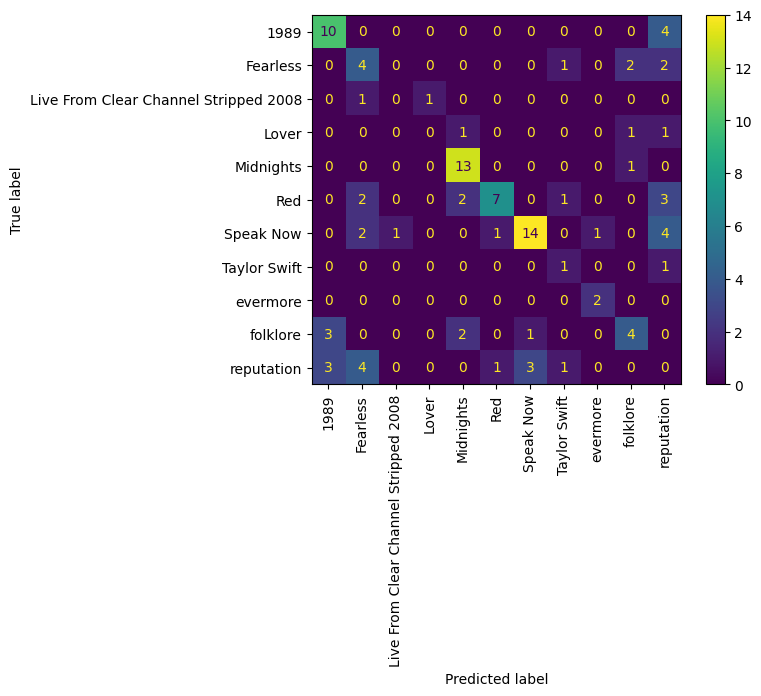

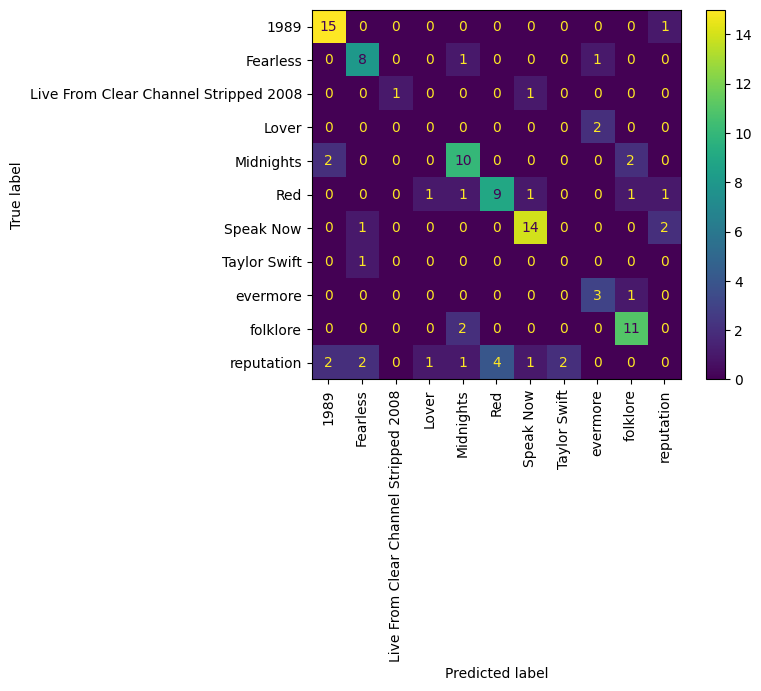

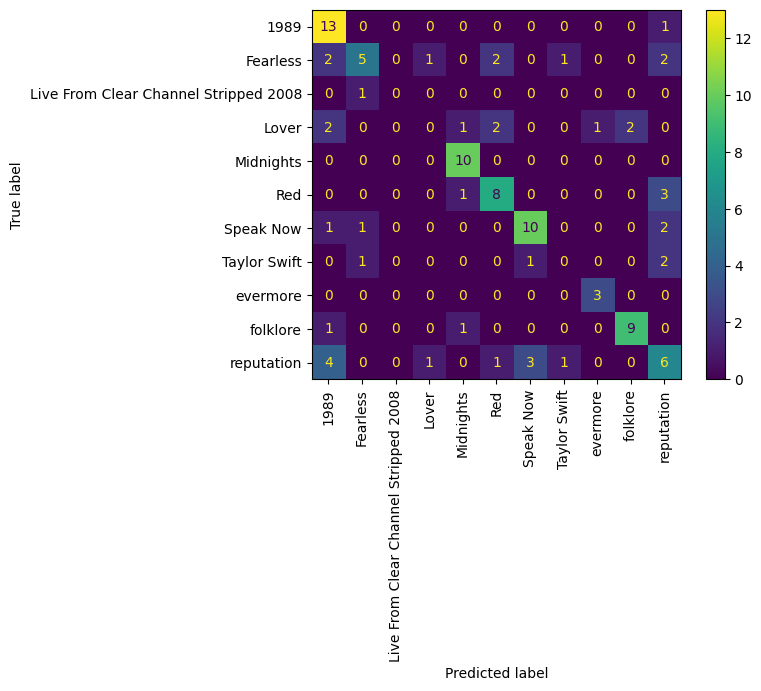

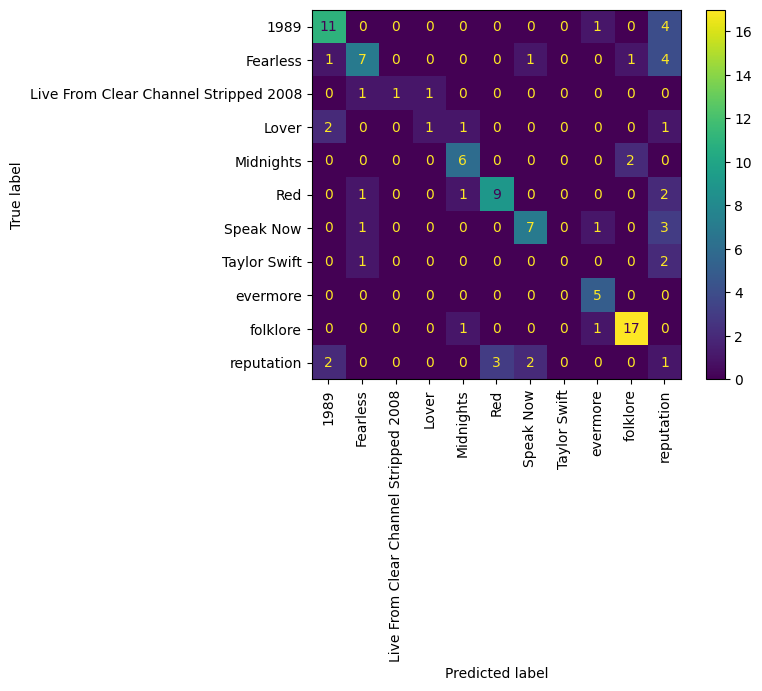

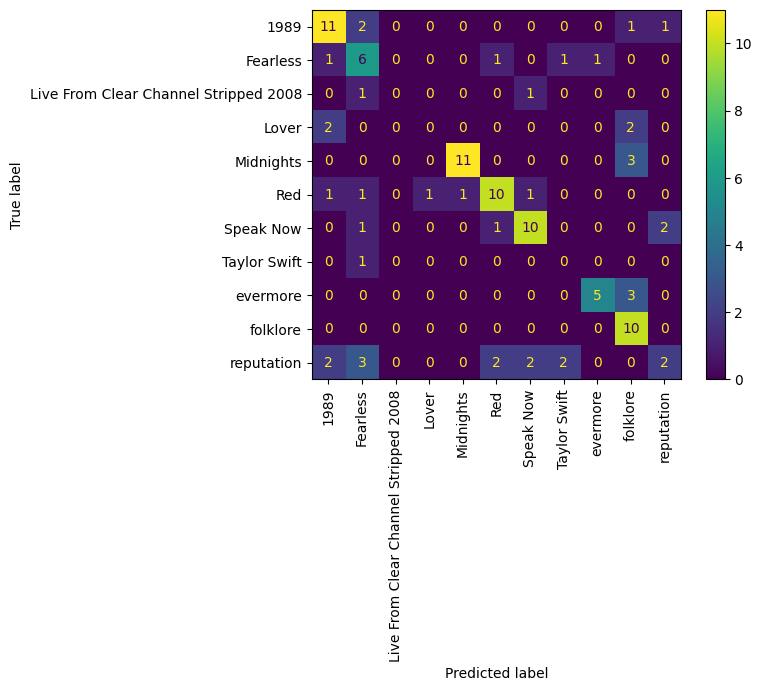

In [123]:
# Display and evaluate the confusion matrices
for matrix, matrix_df in zip(confusion_matrices, confusion_matrix_dfs): # Iterate over the dataframes from the matrix too to get album labelsmatrix, display_labels=matrix_df.colu)
    disp = ConfusionMatrixDisplay(matrix, display_labels=matrix_df.columns)
    disp.plot()
    plt.xticks(rotation=90) # Rotate the x-axis labels so that they do not overlap
    plt.show()
    print('\n\n\n\n\n\n')

A quick glace at these confusion matrices shows that the k-NN algorithm performed better than simply guessing the labels at random, as the diagonal which is indicative of true positives for each album clearly stands out in lighter colors, meaning higher values. The *Live From Clear Channel Stripped 2008* album, which is simply a collection of live recordings from other albums, received very few correct classifications, which reflects the fact that there were very few songs from this album in the dataset, and that as a compilation, it would not have the distinctive features of the other albums. The albums which seemed to be classified correctly most often, suggesting that their styles are more distinctive, were 1989, Midnights, Red, Speak Now, and folklore. There was some confusion between predictions for 'evermore' and 'folklore', which makes sense, as these have been described by many fans as ['sonically, a bit of a shift'](https://forums.stevehoffman.tv/threads/for-those-who-listen-to-taylor-swift-i-would-love-some-recs-of-where-to-go-next.1191101/), and were released shortly after one another during the COVID-19 pandemic. Overall, the Lover, Taylor Swift debut album and reputation were poorly classified, which may suggest that they contain a combination of styles. </br>
Now, we will look in more detail at the averaged scores for precision, recall and f1 along the classes.

In [128]:
# Put the reports in a dataframe and add a multi-index to indicate the fold
reports_df = []
for report in classification_reports:
    # Convert the dictionary to a DataFrame
    report_df = pd.DataFrame(report).transpose()
    reports_df.append(report_df)
# Concatenate the reports and indicate the fold
multi_index = [f'k-NN: fold nr {i+1}' for i in range(len(reports_df))]
classification_reports_df = pd.concat(reports_df, keys=multi_index)
classification_reports_df.head(50)

precision    recall  \
k-NN: fold nr 1 1989                                    0.625000  0.714286   
                Fearless                                0.307692  0.444444   
                Live From Clear Channel Stripped 2008   0.000000  0.000000   
                Lover                                   0.000000  0.000000   
                Midnights                               0.722222  0.928571   
                Red                                     0.777778  0.466667   
                Speak Now                               0.777778  0.608696   
                Taylor Swift                            0.250000  0.500000   
                evermore                                0.666667  1.000000   
                folklore                                0.500000  0.400000   
                reputation                              0.000000  0.000000   
                accuracy                                0.518868  0.518868   
                macro avg                               0.420649  0.460242   
                weighted avg                            0.547351  0.518868   
k-NN: fold nr 2 1989                                    0.789474  0.937500   
                Fearless                                0.666667  0.800000   
                Live From Clear Channel Stripped 2008   1.000000  0.500000   
                Lover                                   0.000000  0.000000   
                Midnights                               0.666667  0.714286   
                Red                                     0.692308  0.642857   
                Speak Now                               0.823529  0.823529   
                Taylor Swift                            0.000000  0.000000   
                evermore                                0.500000  0.750000   
                folklore                                0.733333  0.846154   
                reputation                              0.000000  0.000000   
                accuracy                                0.669811  0.669811   
                macro avg                               0.533816  0.546757   
                weighted avg                            0.621295  0.669811   
k-NN: fold nr 3 1989                                    0.565217  0.928571   
                Fearless                                0.625000  0.384615   
                Live From Clear Channel Stripped 2008   0.000000  0.000000   
                Lover                                   0.000000  0.000000   
                Midnights                               0.769231  1.000000   
                Red                                     0.615385  0.666667   
                Speak Now                               0.714286  0.714286   
                Taylor Swift                            0.000000  0.000000   
                evermore                                0.750000  1.000000   
                folklore                                0.818182  0.818182   
                reputation                              0.375000  0.375000   
                accuracy                                0.603774  0.603774   
                macro avg                               0.475664  0.535211   
                weighted avg                            0.550613  0.603774   
k-NN: fold nr 4 1989                                    0.687500  0.687500   
                Fearless                                0.636364  0.500000   
                Live From Clear Channel Stripped 2008   1.000000  0.333333   
                Lover                                   0.500000  0.200000   
                Midnights                               0.666667  0.750000   
                Red                                     0.750000  0.692308   
                Speak Now                               0.700000  0.583333   
                Taylor Swift                            0.000000  0.000000   

                                                       f1-score     support 

In [158]:
# Now add an average for all of the folds to the dataframe

# Group by the first level (album) and calculate the mean values for each fold
average_df = classification_reports_df.groupby(level=1).mean()
# Set the outer index of this averages section of the data frame 
# Reference on how to use .from_product method: https://vitalflux.com/pandas-creating-multiindex-dataframe-from-product-or-tuples/#:~:text=Create%20MultiIndex%20Dataframe%20using%20Product,each%20iterable%20in%20the%20input.
average_df.index = pd.MultiIndex.from_product([['k-NN: Average'], average_df.index], names=['k-NN', 'fold'])
average_df.index # Show the new index

MultiIndex([('k-NN: Average',                                  '1989'),
            ('k-NN: Average',                              'Fearless'),
            ('k-NN: Average', 'Live From Clear Channel Stripped 2008'),
            ('k-NN: Average',                                 'Lover'),
            ('k-NN: Average',                             'Midnights'),
            ('k-NN: Average',                                   'Red'),
            ('k-NN: Average',                             'Speak Now'),
            ('k-NN: Average',                          'Taylor Swift'),
            ('k-NN: Average',                              'accuracy'),
            ('k-NN: Average',                              'evermore'),
            ('k-NN: Average',                              'folklore'),
            ('k-NN: Average',                             'macro avg'),
            ('k-NN: Average',                            'reputation'),
            ('k-NN: Average',                          'weighted

In [167]:
# Concatenate the original DataFrame and the 'average_df' horizontally
result_df = pd.concat([classification_reports_df, average_df])
# Set the display options to show more rows
pd.set_option('display.max_rows', 100)
result_df.head(90)

precision    recall  \
k-NN: fold nr 1 1989                                    0.625000  0.714286   
                Fearless                                0.307692  0.444444   
                Live From Clear Channel Stripped 2008   0.000000  0.000000   
                Lover                                   0.000000  0.000000   
                Midnights                               0.722222  0.928571   
                Red                                     0.777778  0.466667   
                Speak Now                               0.777778  0.608696   
                Taylor Swift                            0.250000  0.500000   
                evermore                                0.666667  1.000000   
                folklore                                0.500000  0.400000   
                reputation                              0.000000  0.000000   
                accuracy                                0.518868  0.518868   
                macro avg                               0.420649  0.460242   
                weighted avg                            0.547351  0.518868   
k-NN: fold nr 2 1989                                    0.789474  0.937500   
                Fearless                                0.666667  0.800000   
                Live From Clear Channel Stripped 2008   1.000000  0.500000   
                Lover                                   0.000000  0.000000   
                Midnights                               0.666667  0.714286   
                Red                                     0.692308  0.642857   
                Speak Now                               0.823529  0.823529   
                Taylor Swift                            0.000000  0.000000   
                evermore                                0.500000  0.750000   
                folklore                                0.733333  0.846154   
                reputation                              0.000000  0.000000   
                accuracy                                0.669811  0.669811   
                macro avg                               0.533816  0.546757   
                weighted avg                            0.621295  0.669811   
k-NN: fold nr 3 1989                                    0.565217  0.928571   
                Fearless                                0.625000  0.384615   
                Live From Clear Channel Stripped 2008   0.000000  0.000000   
                Lover                                   0.000000  0.000000   
                Midnights                               0.769231  1.000000   
                Red                                     0.615385  0.666667   
                Speak Now                               0.714286  0.714286   
                Taylor Swift                            0.000000  0.000000   
                evermore                                0.750000  1.000000   
                folklore                                0.818182  0.818182   
                reputation                              0.375000  0.375000   
                accuracy                                0.603774  0.603774   
                macro avg                               0.475664  0.535211   
                weighted avg                            0.550613  0.603774   
k-NN: fold nr 4 1989                                    0.687500  0.687500   
                Fearless                                0.636364  0.500000   
                Live From Clear Channel Stripped 2008   1.000000  0.333333   
                Lover                                   0.500000  0.200000   
                Midnights                               0.666667  0.750000   
                Red                                     0.750000  0.692308   
                Speak Now                               0.700000  0.583333   
                Taylor Swift                            0.000000  0.000000   
                evermore                                0.625000  1.000000   

In [166]:
# Print the average precision, recall and f1 as well
average_section = result_df.xs('k-NN: Average', level=0) # Extract the fold average section from the dataframe

# Calculate the mean for precision, recall, and f1-score
mean_precision = average_section['precision'].mean()
mean_recall = average_section['recall'].mean()
mean_f1_score = average_section['f1-score'].mean()

# Print or use the mean values as needed
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-Score:", mean_f1_score)

Mean Precision: 0.5119689171347673
Mean Recall: 0.5227630064948403
Mean F1-Score: 0.50300685530065


To evaluate, the k-NN algorithm performed with an accuracy score of 0.6, meaning that it classified more songs correctly than if the labels were randomly guessed by chance. However, this could be misleading due to the 'accuracy paradox' and the imbalanced classes mentioned before. The precision and recall were 0.5, which means that the algorithm did not perform better than random chance. However, let's look in more detail at how successful the algorithm was at predicting specific albums. The f1 scores for 1989, Midnights, Red, Speak Now, folklore and evermore were much higher than 0.5, with the highest being 0.78 for Midnights. This means that both the precision (how trustworthy or reliable the positive classifications for this album are), and the recall (how many instances of songs on this album were correctly classified) were very high for this albun, indicating that it is stylistically distinct from the other albums. Therefore, it is not correct to conclude that the algorithm was poor in performing this classification task. It performed extremely well on distinguishing certain albums and not others, with the Taylor Swift and Live album being so low in samples that the lack of data entries could be responsible for this. As such, the k-NN classifier has been partly successful at predicting labels for a specific subset of albums. This indicates that the songs on these albums are more distinct than those on other albums that resulted in low f1 scores.